In [1]:
#from workerDECONVOLUTION_BBD103smTAD import *
from ioMicro import *

### Experiment 103 is on Lemon

In [9]:
#\\merfish8\merfish8v2\D103_Myh67_d80\DNA_singleCy5
#intron_flds = glob.glob(r'\\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H*I*')
#exon_flds = glob.glob(r'\\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H*Q*')

single_flds = glob.glob(r'/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H*B*')
single_flds

['/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H1_B1_2_3',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H3_B7_8_9',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H4_B10_11_12',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H5_B13_14_15',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H6_B16_17_18',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H7_B19_20_21',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H8_B22_23_24',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H9_B25_26_27',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H10_B28_29_30',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H11_B31_32_33',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H12_B34_35_36',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H13_B37_38_39',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H14_B40_41_42',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H15_B43_44_45',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H16_B46_47_48',
 '/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H17_B4

### Check some fields of view to determine waht you can use as a PSF reference

In [10]:
fld = single_flds[1]
#fld = r'/mnt/merfish8v1/20230805_D103_Myh67_d80KO/DNA/H14_B40_41_42'
#fld = r'\\merfish8\merfish8v1\20230805_D103_Myh67_d80KO\RNA\H40_I19_20_21'
fovs = glob.glob(fld+os.sep+'*.zarr')


(-0.5, 2047.5, 2047.5, -0.5)

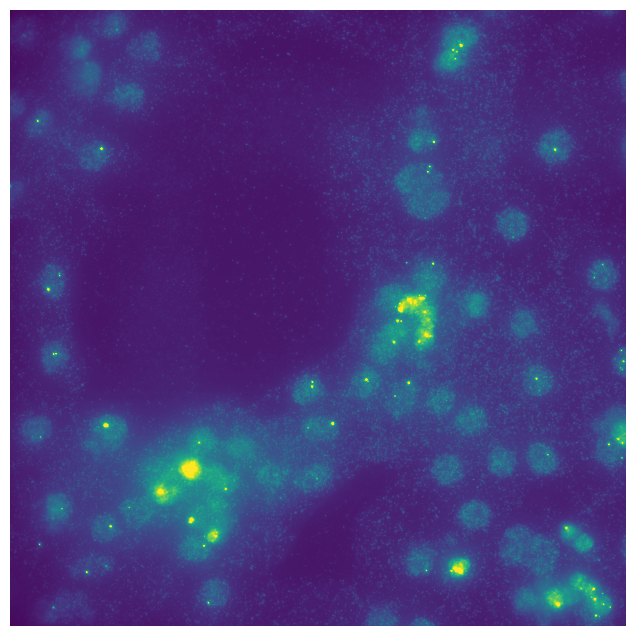

In [23]:
im = read_im(fovs[53])#[50,53,54,30,0,90]
#import napari
#napari.view_image(im[1])##color
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
maxim = im[1].max(axis=0)
plt.imshow(maxim, vmax=np.percentile(np.array(maxim), 99.9))
plt.axis("off")

### 1. Compute PSF

In [24]:
psfs = []

In [25]:
for ifov in tqdm([50,53,54,30,0,90]):
    im = read_im(fovs[ifov])[1]  ######Needs to match what you explored
    im_ = np.array(im[1:],dtype=np.float32)
    psf = get_psf(im_,th=1000,th_cor = 0.75,delta=3,delta_fit = 7,sxyzP = [15,60,60])
    psfs.append(psf)
#napari.view_image(im)
psff = np.mean([psf for psf in psfs if psf is not None],axis=0)
psff_ = np.array([p-np.median(p) for p in psff])
from scipy.ndimage import median_filter
psff_med = median_filter(psff_, size=15)
psfff = (psff_-psff_med)[5:-5,5:-5,5:-5][:-1,:-1,:-1]
psfff[psfff<0]=0
psfff = psfff/np.max(psfff)
np.save(r'psf_D103_B.npy',psfff)

100%|██████████| 6/6 [01:06<00:00, 11.01s/it]


In [35]:
psf2 = np.load("psf_750_Scope3BB.npy")
psf3 = np.load("psf_647_Kiwi.npy")
psf4 = np.load("psf_647_Lemon.npy")

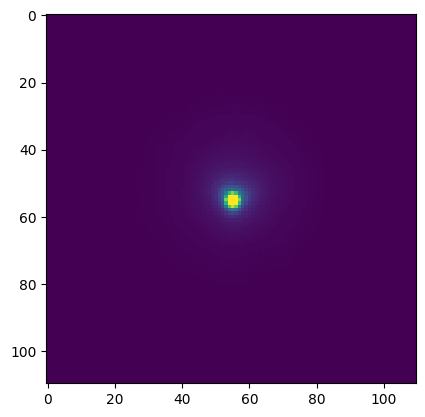

: 

In [48]:
plt.imshow(psf3.max(axis=0), vmax=0.5)

In [34]:
from scipy.stats import pearsonr

pearsonr(psf2.flatten(), psfff.flatten())

PearsonRResult(statistic=0.9845077949649972, pvalue=0.0)

In [37]:
pearsonr(psf4.flatten(), psf3.flatten())

PearsonRResult(statistic=0.9747387686700535, pvalue=0.0)

In [33]:
import napari
napari.view_image(psfff)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 54.5, 54.5), zoom=4.810454545454545, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(10.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 20.0, 1.0), (0.0, 110.0, 1.0), (0.0, 110.0, 1.0)), current_step=(10, 55, 55), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'psfff' at 0x2746cac7b20>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ], dtype=float32), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT:

In [35]:
im_raw = np.array(im[1],dtype=np.float32)

In [37]:
im_dec = full_deconv(im_raw,s_=500,pad=100,psf=psfff,parameters={'method': 'wiener', 'beta': 0.001, 'niter': 50},gpu=True,force=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.28it/s]


In [42]:
v = napari.view_image(im_raw)
v.add_image(im_dec,contrast_limits=[0,np.percentile(im_dec,99.99)])

<Image layer 'im_dec' at 0x275fa1275e0>

### 2. Compute flat field correction

In [47]:
data_fld = r'\\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33'
save_folder = r'D:\Carlos\Scripts\flat_field'
if not os.path.exists(save_folder): os.makedirs(save_folder)

In [48]:
compute_flat_field_raw(data_fld=data_fld,
    save_folder=save_folder,tag='Kiwi',
    ncols=4)### 750,cy5,cy3,405

100%|████████████████████████████████████████████████████████████████████████████████| 399/399 [02:33<00:00,  2.60it/s]


In [1]:
from workerDECONVOLUTION_BBD101comp import *
from ioMicro import *

In [2]:
main_f(['',0],try_mode=False)

Computing fitting on: Conv_zscan__000.zarr
131 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 247.11it/s]


Computing drift on: Conv_zscan__000.zarr


  0%|                                                                                          | 0/131 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.43it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  1%|▌                                                                               | 1/131 [01:01<2:12:26, 61.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.64it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/131 [01:23<1:22:20, 38.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/131 [01:46<1:07:16, 31.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/131 [02:11<1:00:33, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]


Finding rough drift...


  4%|███▏                                                                              | 5/131 [02:34<56:12, 26.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.70it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▊                                                                              | 6/131 [02:55<51:29, 24.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.90it/s]


Finding rough drift...


  5%|████▍                                                                             | 7/131 [03:17<49:13, 23.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.01it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  6%|█████                                                                             | 8/131 [03:38<47:08, 22.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:31<00:00,  4.46s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:34<00:00,  4.94s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/131 [05:06<1:27:59, 43.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]


Finding rough drift...


  8%|██████                                                                         | 10/131 [05:29<1:14:31, 36.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]


Finding rough drift...


  8%|██████▋                                                                        | 11/131 [05:51<1:04:44, 32.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


  9%|███████▍                                                                         | 12/131 [06:15<59:31, 30.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]


Finding rough drift...


 10%|████████                                                                         | 13/131 [06:39<55:18, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]


Finding rough drift...


 11%|████████▋                                                                        | 14/131 [07:02<51:44, 26.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


Finding rough drift...


 11%|█████████▎                                                                       | 15/131 [07:24<48:36, 25.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]


Finding rough drift...


 12%|█████████▉                                                                       | 16/131 [07:45<45:57, 23.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]


Finding rough drift...


 13%|██████████▌                                                                      | 17/131 [08:07<44:24, 23.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]


Finding rough drift...


 14%|███████████▏                                                                     | 18/131 [08:30<43:38, 23.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]


Finding rough drift...


 15%|███████████▋                                                                     | 19/131 [08:51<42:05, 22.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/131 [09:14<42:05, 22.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/131 [09:37<41:50, 22.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/131 [10:00<41:42, 22.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]


Finding rough drift...


 18%|██████████████▏                                                                  | 23/131 [10:23<41:14, 22.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]


Finding rough drift...


 18%|██████████████▊                                                                  | 24/131 [10:47<41:21, 23.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]


Finding rough drift...


 19%|███████████████▍                                                                 | 25/131 [11:10<40:52, 23.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]


Finding rough drift...


 20%|████████████████                                                                 | 26/131 [11:32<39:53, 22.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]


Finding rough drift...


 21%|████████████████▋                                                                | 27/131 [11:55<39:30, 22.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]


Finding rough drift...


 21%|█████████████████▎                                                               | 28/131 [12:18<39:07, 22.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 22%|█████████████████▉                                                               | 29/131 [12:43<40:10, 23.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]


Finding rough drift...


 23%|██████████████████▌                                                              | 30/131 [13:06<39:33, 23.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 24%|███████████████████▏                                                             | 31/131 [13:30<39:25, 23.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 24%|███████████████████▊                                                             | 32/131 [13:56<40:04, 24.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]


Finding rough drift...


 25%|████████████████████▍                                                            | 33/131 [14:20<39:39, 24.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 26%|█████████████████████                                                            | 34/131 [14:45<39:26, 24.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]


Finding rough drift...


 27%|█████████████████████▋                                                           | 35/131 [15:07<37:44, 23.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]


Finding rough drift...


 27%|██████████████████████▎                                                          | 36/131 [15:28<36:16, 22.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]


Finding rough drift...


 28%|██████████████████████▉                                                          | 37/131 [15:51<35:58, 22.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]


Finding rough drift...


 29%|███████████████████████▍                                                         | 38/131 [16:12<34:25, 22.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]


Finding rough drift...


 30%|████████████████████████                                                         | 39/131 [16:35<34:28, 22.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 31%|████████████████████████▋                                                        | 40/131 [17:01<35:57, 23.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 31%|█████████████████████████▎                                                       | 41/131 [17:26<36:11, 24.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]


Finding rough drift...


 32%|█████████████████████████▉                                                       | 42/131 [18:10<44:24, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]


Finding rough drift...


 33%|██████████████████████████▌                                                      | 43/131 [18:33<40:56, 27.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]


Finding rough drift...


 34%|███████████████████████████▏                                                     | 44/131 [19:17<47:32, 32.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]


Finding rough drift...


 34%|███████████████████████████▊                                                     | 45/131 [20:05<53:28, 37.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]


Finding rough drift...


 35%|████████████████████████████▍                                                    | 46/131 [20:31<48:09, 33.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]


Finding rough drift...


 36%|█████████████████████████████                                                    | 47/131 [21:02<46:10, 32.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]


Finding rough drift...


 37%|█████████████████████████████▋                                                   | 48/131 [21:45<49:44, 35.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 37%|██████████████████████████████▎                                                  | 49/131 [22:15<46:35, 34.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 38%|██████████████████████████████▉                                                  | 50/131 [23:08<53:49, 39.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]


Finding rough drift...


 39%|███████████████████████████████▌                                                 | 51/131 [23:41<50:13, 37.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]


Finding rough drift...


 40%|████████████████████████████████▏                                                | 52/131 [24:19<49:55, 37.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]


Finding rough drift...


 40%|████████████████████████████████▊                                                | 53/131 [24:55<48:28, 37.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]


Finding rough drift...


 41%|█████████████████████████████████▍                                               | 54/131 [25:18<42:17, 32.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 42%|██████████████████████████████████                                               | 55/131 [25:57<44:01, 34.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]


Finding rough drift...


 43%|██████████████████████████████████▋                                              | 56/131 [26:21<39:38, 31.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 44%|███████████████████████████████████▏                                             | 57/131 [27:05<43:24, 35.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 44%|███████████████████████████████████▊                                             | 58/131 [27:40<42:54, 35.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]


Finding rough drift...


 45%|████████████████████████████████████▍                                            | 59/131 [28:30<47:39, 39.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]


Finding rough drift...


 46%|█████████████████████████████████████                                            | 60/131 [28:55<41:35, 35.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]


Finding rough drift...


 47%|█████████████████████████████████████▋                                           | 61/131 [29:37<43:42, 37.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]


Finding rough drift...


 47%|██████████████████████████████████████▎                                          | 62/131 [29:58<37:12, 32.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]


Finding rough drift...


 48%|██████████████████████████████████████▉                                          | 63/131 [30:38<39:23, 34.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]


Finding rough drift...


 49%|███████████████████████████████████████▌                                         | 64/131 [31:05<36:08, 32.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


Finding rough drift...


 50%|████████████████████████████████████████▏                                        | 65/131 [31:45<38:08, 34.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]


Finding rough drift...


 50%|████████████████████████████████████████▊                                        | 66/131 [32:10<34:24, 31.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


 51%|█████████████████████████████████████████▍                                       | 67/131 [33:03<40:36, 38.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 52%|██████████████████████████████████████████                                       | 68/131 [33:41<40:06, 38.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▋                                      | 69/131 [34:19<39:12, 37.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 53%|███████████████████████████████████████████▎                                     | 70/131 [35:10<42:39, 41.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▉                                     | 71/131 [35:51<41:38, 41.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▌                                    | 72/131 [36:13<35:11, 35.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▏                                   | 73/131 [36:57<36:51, 38.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▊                                   | 74/131 [37:40<37:34, 39.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████▎                                  | 75/131 [38:18<36:31, 39.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▉                                  | 76/131 [38:44<32:25, 35.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▌                                 | 77/131 [39:21<32:13, 35.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▏                                | 78/131 [39:45<28:25, 32.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▊                                | 79/131 [40:36<32:51, 37.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▍                               | 80/131 [41:02<29:11, 34.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████                               | 81/131 [41:44<30:26, 36.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▋                              | 82/131 [42:11<27:39, 33.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:26<00:00,  3.78s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:27<00:00,  3.91s/it]


Finding rough drift...


 63%|███████████████████████████████████████████████████▎                             | 83/131 [43:46<41:35, 52.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]


Finding rough drift...


 64%|███████████████████████████████████████████████████▉                             | 84/131 [44:25<37:49, 48.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▌                            | 85/131 [44:50<31:28, 41.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▏                           | 86/131 [45:34<31:26, 41.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.15it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▊                           | 87/131 [46:02<27:51, 37.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▍                          | 88/131 [46:48<28:51, 40.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████                          | 89/131 [47:27<27:52, 39.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▋                         | 90/131 [47:52<24:09, 35.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]


Finding rough drift...


 69%|████████████████████████████████████████████████████████▎                        | 91/131 [48:38<25:42, 38.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▉                        | 92/131 [49:06<23:05, 35.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▌                       | 93/131 [49:56<25:11, 39.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████                       | 94/131 [50:23<22:10, 35.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▋                      | 95/131 [51:09<23:30, 39.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▎                     | 96/131 [51:37<20:43, 35.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]


Finding rough drift...


 74%|███████████████████████████████████████████████████████████▉                     | 97/131 [52:14<20:31, 36.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▌                    | 98/131 [52:48<19:31, 35.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]


Finding rough drift...


 76%|█████████████████████████████████████████████████████████████▏                   | 99/131 [53:19<18:09, 34.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]


Finding rough drift...


 76%|█████████████████████████████████████████████████████████████                   | 100/131 [54:08<19:51, 38.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▋                  | 101/131 [54:29<16:42, 33.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▎                 | 102/131 [55:10<17:10, 35.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]


Finding rough drift...


 79%|██████████████████████████████████████████████████████████████▉                 | 103/131 [55:59<18:34, 39.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████▌                | 104/131 [56:25<16:01, 35.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████                | 105/131 [57:08<16:21, 37.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▋               | 106/131 [57:32<14:01, 33.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▎              | 107/131 [58:11<14:06, 35.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▉              | 108/131 [58:57<14:44, 38.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▌             | 109/131 [59:25<12:54, 35.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 84%|█████████████████████████████████████████████████████████████████▍            | 110/131 [1:00:04<12:45, 36.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]


Finding rough drift...


 85%|██████████████████████████████████████████████████████████████████            | 111/131 [1:00:44<12:32, 37.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]


Finding rough drift...


 85%|██████████████████████████████████████████████████████████████████▋           | 112/131 [1:01:17<11:24, 36.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 86%|███████████████████████████████████████████████████████████████████▎          | 113/131 [1:02:11<12:25, 41.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 114/131 [1:02:52<11:41, 41.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▍         | 115/131 [1:03:24<10:15, 38.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████         | 116/131 [1:04:14<10:29, 41.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 117/131 [1:04:49<09:20, 40.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 118/131 [1:05:14<07:40, 35.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▊       | 119/131 [1:05:58<07:37, 38.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▍      | 120/131 [1:06:29<06:34, 35.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 121/131 [1:07:11<06:16, 37.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 122/131 [1:07:39<05:13, 34.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▏    | 123/131 [1:08:04<04:15, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 124/131 [1:08:34<03:39, 31.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 125/131 [1:08:59<02:56, 29.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 126/131 [1:09:27<02:24, 28.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▌  | 127/131 [1:09:56<01:56, 29.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 128/131 [1:10:24<01:26, 28.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 129/131 [1:10:52<00:56, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 130/131 [1:11:20<00:28, 28.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__000.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 131/131 [1:11:47<00:00, 32.88s/it]

Finding fine drift...


['', 0]

In [ ]:
#started running d101 whole dataset, @ 1:30 pm on 8/2/2023
errors = []
for i in range(0,399):
    try:
        main_f(['',i],try_mode=True)
    
    except:
        print("there is an error at: "+ str(i)) 
        errors.append(i)
    

Computing fitting on: Conv_zscan__000.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 248.86it/s]


Computing drift on: Conv_zscan__000.zarr
Computing fitting on: Conv_zscan__001.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 173.36it/s]


Computing drift on: Conv_zscan__001.zarr
Computing fitting on: Conv_zscan__002.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 235.50it/s]


Computing drift on: Conv_zscan__002.zarr
Computing fitting on: Conv_zscan__003.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 251.85it/s]


Computing drift on: Conv_zscan__003.zarr
Computing fitting on: Conv_zscan__004.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 249.00it/s]


Computing drift on: Conv_zscan__004.zarr
Computing fitting on: Conv_zscan__005.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 255.26it/s]


Computing drift on: Conv_zscan__005.zarr
Computing fitting on: Conv_zscan__006.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 250.89it/s]


Computing drift on: Conv_zscan__006.zarr
Computing fitting on: Conv_zscan__007.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 244.84it/s]


Computing drift on: Conv_zscan__007.zarr
Computing fitting on: Conv_zscan__008.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 258.76it/s]


Computing drift on: Conv_zscan__008.zarr
Computing fitting on: Conv_zscan__009.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 210.81it/s]


Computing drift on: Conv_zscan__009.zarr
Computing fitting on: Conv_zscan__010.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 248.06it/s]


Computing drift on: Conv_zscan__010.zarr
Computing fitting on: Conv_zscan__011.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 253.79it/s]


Computing drift on: Conv_zscan__011.zarr
Computing fitting on: Conv_zscan__012.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 247.03it/s]


Computing drift on: Conv_zscan__012.zarr
Computing fitting on: Conv_zscan__013.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 257.75it/s]


Computing drift on: Conv_zscan__013.zarr
Computing fitting on: Conv_zscan__014.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 245.30it/s]


Computing drift on: Conv_zscan__014.zarr
Computing fitting on: Conv_zscan__015.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 242.15it/s]


Computing drift on: Conv_zscan__015.zarr
Computing fitting on: Conv_zscan__016.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 262.24it/s]


Computing drift on: Conv_zscan__016.zarr
Computing fitting on: Conv_zscan__017.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 228.72it/s]


Computing drift on: Conv_zscan__017.zarr
Computing fitting on: Conv_zscan__018.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 223.70it/s]


Computing drift on: Conv_zscan__018.zarr
Computing fitting on: Conv_zscan__019.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 232.26it/s]


Computing drift on: Conv_zscan__019.zarr
Computing fitting on: Conv_zscan__020.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 230.92it/s]


Computing drift on: Conv_zscan__020.zarr
Computing fitting on: Conv_zscan__021.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [27:59<00:00, 12.72s/it]


Computing drift on: Conv_zscan__021.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.72it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  1%|▌                                                                               | 1/132 [00:43<1:33:55, 43.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.92it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:06<1:08:39, 31.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:33<1:03:25, 29.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:01<1:01:20, 28.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:29<1:00:30, 28.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [02:58<1:00:08, 28.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:26<59:15, 28.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:55<59:08, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:22<57:28, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:50<57:01, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:18<56:39, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:47<56:44, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:15<55:49, 28.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:42<55:03, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:09<53:40, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:36<53:03, 27.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:03<52:35, 27.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:30<51:54, 27.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:58<51:52, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:27<51:52, 27.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:55<51:36, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:22<50:53, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:50<50:17, 27.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:18<50:05, 27.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:46<49:34, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:13<48:38, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:42<49:02, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:10<48:31, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:38<47:59, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:06<47:45, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:35<47:37, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:03<47:00, 28.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:31<46:31, 28.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:00<46:17, 28.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:27<45:31, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:56<45:12, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:23<44:25, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:51<43:43, 27.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:19<43:20, 27.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:46<42:30, 27.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:13<41:40, 27.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:41<41:23, 27.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:08<40:39, 27.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:37<40:50, 27.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:07<41:21, 28.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:34<40:25, 28.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:59<38:13, 26.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:24<37:15, 26.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:48<35:43, 25.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:15<35:41, 26.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:43<35:48, 26.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:15<37:40, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:43<37:04, 28.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:14<37:57, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:43<37:18, 29.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:13<37:15, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:42<36:29, 29.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:09<35:18, 28.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:35<33:45, 27.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:01<32:29, 27.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:29<32:33, 27.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [28:58<32:37, 27.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:28<32:46, 28.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [29:56<32:01, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:24<31:39, 28.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [30:49<30:10, 27.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [31:13<28:17, 26.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [31:40<28:11, 26.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [32:07<28:05, 26.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [32:36<28:14, 27.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [33:04<27:57, 27.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [33:31<27:27, 27.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [33:59<26:59, 27.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [34:26<26:36, 27.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [34:56<26:45, 28.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [35:22<25:48, 27.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [35:50<25:18, 27.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [36:19<25:16, 28.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [36:47<24:39, 27.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [37:13<23:41, 27.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [37:38<22:46, 26.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [38:03<21:45, 26.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [38:28<21:02, 25.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:30<00:00,  4.42s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:31<00:00,  4.56s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [39:57<35:47, 44.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [40:23<30:43, 39.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [40:49<27:00, 35.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [41:15<24:24, 32.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [41:41<22:22, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [42:08<21:08, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [42:34<19:58, 28.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [43:02<19:17, 28.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [43:27<18:10, 27.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [43:48<16:27, 25.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [44:14<16:10, 25.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [44:37<15:23, 24.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [45:01<14:44, 24.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [45:23<13:49, 23.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [45:47<13:29, 23.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [46:13<13:29, 24.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [46:41<13:43, 25.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [47:12<13:58, 27.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [47:39<13:33, 27.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [48:04<12:50, 26.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [48:30<12:18, 26.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [48:57<11:52, 26.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [49:22<11:22, 26.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [49:50<11:04, 26.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [50:25<11:37, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [50:49<10:34, 27.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [51:19<10:22, 28.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [51:46<09:48, 28.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [52:11<09:00, 27.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [52:35<08:18, 26.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [53:08<08:28, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [53:41<08:24, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [54:03<07:17, 27.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [54:30<06:48, 27.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [54:54<06:07, 26.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [55:22<05:46, 26.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [55:47<05:16, 26.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [56:24<05:24, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [56:55<04:58, 29.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 93%|██████████████████████████████████████████████████████████████████████████▌     | 123/132 [57:27<04:34, 30.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]


Finding rough drift...


 94%|███████████████████████████████████████████████████████████████████████████▏    | 124/132 [57:54<03:56, 29.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]


Finding rough drift...


 95%|███████████████████████████████████████████████████████████████████████████▊    | 125/132 [58:21<03:21, 28.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]


Finding rough drift...


 95%|████████████████████████████████████████████████████████████████████████████▎   | 126/132 [58:49<02:50, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]


Finding rough drift...


 96%|████████████████████████████████████████████████████████████████████████████▉   | 127/132 [59:16<02:20, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]


Finding rough drift...


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 128/132 [59:44<01:52, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:00:12<01:23, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:00:41<00:56, 28.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:01:09<00:28, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__021.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:01:37<00:00, 28.01s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__022.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:39<00:00, 25.76s/it]


Computing drift on: Conv_zscan__022.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 21.21it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  1%|▌                                                                               | 1/132 [00:39<1:27:01, 39.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 19.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.41it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:04<1:06:22, 30.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:29<1:00:20, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]


Finding rough drift...


  3%|██▍                                                                               | 4/132 [01:55<58:35, 27.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]


Finding rough drift...


  4%|███                                                                               | 5/132 [02:21<57:01, 26.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [02:47<55:59, 26.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:13<55:09, 26.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:39<54:11, 26.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.89s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.21s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [05:31<1:48:59, 53.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [05:58<1:31:40, 45.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:24<1:18:48, 39.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [06:49<1:09:58, 34.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:15<1:03:54, 32.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [07:42<59:47, 30.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [08:07<56:06, 28.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [08:31<53:20, 27.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:56<50:58, 26.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [09:21<49:44, 26.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:46<48:43, 25.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [10:12<48:14, 25.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:36<47:06, 25.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:03<47:10, 25.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:29<46:48, 25.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:54<46:25, 25.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:21<46:33, 26.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:47<46:06, 26.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:13<45:19, 25.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:38<44:35, 25.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:06<45:00, 26.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:31<44:26, 26.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:57<43:54, 26.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:24<43:33, 26.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.00it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:50<43:06, 26.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:16<42:57, 26.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:43<42:25, 26.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:10<42:36, 26.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:37<42:03, 26.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:03<41:27, 26.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:28<40:24, 26.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:54<39:46, 25.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:19<39:16, 25.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:44<38:10, 25.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:10<38:03, 25.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:35<37:28, 25.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:04<38:21, 26.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:31<38:11, 26.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:59<38:27, 27.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:27<38:11, 27.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:54<37:35, 27.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:22<37:33, 27.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:50<37:19, 27.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:17<36:26, 27.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:45<36:25, 27.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:12<35:47, 27.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:40<35:19, 27.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:06<34:13, 27.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:36<35:05, 28.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:04<34:34, 28.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:35<35:04, 28.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:04<34:38, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:33<34:12, 28.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:01<33:25, 28.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:27<32:03, 27.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [29:55<31:48, 28.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:24<31:28, 28.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [30:51<30:40, 27.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [31:17<29:43, 27.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [31:45<29:26, 27.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [32:12<28:38, 27.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [32:42<29:01, 28.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [33:12<29:17, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [33:42<29:13, 29.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [34:11<28:29, 28.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [34:39<27:46, 28.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [35:07<26:56, 28.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [35:37<26:57, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [36:05<26:18, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [36:33<25:34, 28.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [37:00<24:44, 28.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [37:27<24:04, 27.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [37:56<23:55, 28.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [38:25<23:34, 28.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [38:54<23:26, 28.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:32<00:00,  4.68s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:32<00:00,  4.70s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [40:31<39:18, 49.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [40:59<33:24, 42.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [41:26<29:08, 38.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [41:54<26:24, 35.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [42:23<24:16, 33.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [42:52<22:51, 31.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [43:21<21:44, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [43:48<20:20, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [44:15<19:28, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [44:47<19:25, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [45:16<18:45, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.50it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [45:44<17:56, 29.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [46:09<16:50, 28.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [46:36<16:06, 27.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [47:04<15:41, 27.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [47:32<15:18, 27.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [48:03<15:17, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [48:33<15:04, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [49:03<14:44, 29.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [49:33<14:18, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [50:03<13:50, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [50:29<12:54, 28.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [50:58<12:22, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [51:24<11:37, 27.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [51:49<10:51, 27.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [52:18<10:34, 27.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [52:45<10:05, 27.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [53:12<09:35, 27.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [53:38<08:56, 26.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [54:06<08:38, 27.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [54:37<08:30, 28.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [55:05<07:57, 28.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [55:35<07:42, 28.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [56:05<07:18, 29.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [56:33<06:44, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [57:02<06:15, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [57:30<05:40, 28.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [58:00<05:18, 28.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [58:31<04:55, 29.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 93%|██████████████████████████████████████████████████████████████████████████▌     | 123/132 [59:02<04:30, 30.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 94%|███████████████████████████████████████████████████████████████████████████▏    | 124/132 [59:31<03:57, 29.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:00:01<03:29, 29.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:00:30<02:56, 29.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:01:00<02:28, 29.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:01:30<01:59, 29.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:01:59<01:29, 29.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:02:30<00:59, 29.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:03:00<00:30, 30.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__022.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:03:29<00:00, 28.86s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__023.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [55:24<00:00, 25.18s/it]


Computing drift on: Conv_zscan__023.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.09it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:51<1:53:18, 51.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.15s/it]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:31<1:36:21, 44.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:55<1:15:51, 35.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:20<1:06:57, 31.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:46<1:02:19, 29.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [03:10<57:58, 27.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:35<55:39, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:00<53:36, 25.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:26<53:41, 26.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:52<53:08, 26.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:18<52:30, 26.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:44<51:54, 25.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:10<51:28, 25.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:35<50:16, 25.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [06:59<48:55, 25.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:23<48:01, 24.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:48<47:47, 24.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:12<46:58, 24.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:36<46:12, 24.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:02<46:19, 24.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:27<46:02, 24.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [09:51<45:00, 24.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:16<45:06, 24.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [10:41<44:30, 24.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:05<44:06, 24.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [11:29<43:12, 24.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [11:55<43:19, 24.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [12:20<43:19, 24.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [12:45<42:39, 24.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.74it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:07<41:04, 24.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [13:33<41:18, 24.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [13:58<41:24, 24.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [14:23<40:47, 24.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [14:48<40:34, 24.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [15:12<40:06, 24.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [15:38<40:08, 25.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [16:03<39:23, 24.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [16:27<38:59, 24.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [16:53<38:39, 24.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [17:17<38:00, 24.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [17:39<36:12, 23.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [18:02<35:40, 23.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [18:24<34:24, 23.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.23it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [18:49<34:56, 23.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [19:12<34:09, 23.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.34it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [19:33<32:26, 22.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [19:57<32:46, 23.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.39it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [20:22<32:57, 23.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [20:46<32:47, 23.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [21:10<32:36, 23.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [21:32<31:34, 23.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [21:55<31:03, 23.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.39it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [22:20<31:18, 23.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.77it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [22:46<31:40, 24.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [23:11<31:27, 24.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.93it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [23:34<30:41, 24.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [24:02<31:35, 25.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.22it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [24:28<31:30, 25.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [24:55<31:35, 25.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.20it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [25:21<31:00, 25.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [25:46<30:13, 25.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [26:12<30:08, 25.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [26:35<28:32, 24.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.58it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [27:01<28:37, 25.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [27:27<28:28, 25.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [27:54<28:27, 25.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [28:20<28:02, 25.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.12it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [28:49<28:45, 26.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [29:19<29:08, 27.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [29:46<28:40, 27.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [30:17<29:09, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [30:48<29:16, 29.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [31:15<28:14, 28.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [31:42<27:13, 28.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [32:11<26:53, 28.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [32:40<26:38, 28.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [33:09<26:23, 28.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [33:36<25:25, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [34:06<25:21, 28.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [34:33<24:17, 28.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.83it/s]


Finding rough drift...
Finding fine drift...


 61%|███████████████████████████████████████████████▊                              | 81/132 [44:00<2:41:21, 189.83s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.69it/s]


Finding rough drift...


 62%|████████████████████████████████████████████████▍                             | 82/132 [44:35<1:59:25, 143.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.15it/s]


Finding rough drift...


 63%|█████████████████████████████████████████████████                             | 83/132 [45:04<1:29:00, 108.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.64s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:25<00:00,  3.57s/it]


Finding rough drift...


 64%|██████████████████████████████████████████████████▎                            | 84/132 [46:16<1:18:25, 98.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [46:38<58:55, 75.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [47:02<45:48, 59.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [47:25<36:38, 48.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.31it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [47:47<29:53, 40.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [48:12<25:50, 36.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.00it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [48:32<21:53, 31.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.74it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [48:55<19:40, 28.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.76it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [49:18<17:57, 26.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.38it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [49:39<16:26, 25.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.57it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [50:03<15:47, 24.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [50:28<15:15, 24.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:48<14:07, 23.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.38it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [51:09<13:14, 22.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.31it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:32<12:58, 22.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.47it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:51<11:56, 21.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.95it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:16<12:06, 22.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.39it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:37<11:28, 22.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.07it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:59<11:04, 22.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.48it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:24<10:58, 22.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.62it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:44<10:18, 22.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.39it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:06<09:50, 21.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.78it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:31<09:54, 22.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.63it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:53<09:26, 22.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.90it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:12<08:36, 21.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.42it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:36<08:32, 22.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.85it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:55<07:48, 21.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.57it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:14<07:13, 20.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.11it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:35<06:54, 20.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:56<06:33, 20.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.52it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:18<06:21, 21.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.75it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:41<06:08, 21.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:02<05:44, 21.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.76it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:25<05:29, 22.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.38it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [58:47<05:06, 21.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:08<04:42, 21.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.95it/s]


Finding rough drift...
Finding fine drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [59:32<04:29, 22.46s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [59:59<04:21, 23.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:00:24<04:01, 24.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.20it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:00:50<03:43, 24.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:01:15<03:18, 24.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:01:39<02:51, 24.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.08it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:02:02<02:24, 24.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.10it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:02:27<02:01, 24.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:02:55<01:41, 25.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:03:20<01:16, 25.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:03:46<00:51, 25.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.92it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:04:12<00:25, 25.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__023.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:04:41<00:00, 29.41s/it]


Finding fine drift...
Computing fitting on: Conv_zscan__024.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:39<00:00, 26.20s/it]


Computing drift on: Conv_zscan__024.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 24.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28.68it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  1%|▌                                                                               | 1/132 [00:40<1:29:13, 40.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 25.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28.80it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:04<1:05:56, 30.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:30<1:01:37, 28.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


  3%|██▍                                                                               | 4/132 [01:57<59:39, 27.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


  4%|███                                                                               | 5/132 [02:24<58:46, 27.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [02:52<58:24, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:21<58:42, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:49<58:09, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:17<57:13, 27.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:45<56:58, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:13<56:36, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:41<56:09, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:09<55:30, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:37<54:54, 27.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:04<53:54, 27.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:31<53:18, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:58<52:39, 27.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:26<52:23, 27.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:53<51:23, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:20<50:55, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:46<49:45, 26.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:13<49:26, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:40<48:56, 26.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:08<49:02, 27.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:37<49:35, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:04<48:44, 27.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:33<48:56, 27.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:00<48:03, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:27<47:17, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:55<46:55, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:23<46:42, 27.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:50<45:53, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:19<45:57, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:47<45:48, 28.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:15<45:17, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:42<44:20, 27.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:10<44:01, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:39<43:44, 27.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:06<42:56, 27.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:33<42:13, 27.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:00<41:45, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:27<40:58, 27.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [19:55<40:52, 27.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:24<40:52, 27.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [20:55<41:51, 28.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:28<43:02, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:58<42:23, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:29<42:24, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:00<42:18, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:28<40:45, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:57<39:53, 29.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:28<40:03, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:58<39:19, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:31<40:03, 30.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:01<39:24, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:32<39:05, 30.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:02<38:17, 30.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:36<38:49, 31.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:08<38:25, 31.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:39<37:49, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:08<36:22, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:38<35:34, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:08<35:01, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:42<35:37, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:18<36:29, 32.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:46<34:37, 31.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:16<33:31, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:46<32:45, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:17<32:20, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:46<31:07, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:18<31:11, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:50<31:07, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:20<30:27, 30.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [35:52<30:14, 31.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:22<29:11, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [36:52<28:35, 30.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:20<27:17, 29.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:49<26:41, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:20<26:21, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [38:52<26:28, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:22<25:46, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [39:51<24:57, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:21<24:27, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.94s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.07s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:15<44:19, 55.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:45<37:14, 47.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:14<32:08, 41.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [43:46<29:16, 39.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:14<26:15, 35.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:46<24:45, 34.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:14<22:52, 32.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:46<22:07, 32.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:15<20:57, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:44<20:01, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:14<19:13, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:43<18:30, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:13<17:59, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:43<17:37, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:14<17:14, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:46<16:56, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:18<16:32, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [50:50<16:14, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:21<15:43, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [51:53<15:10, 31.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:23<14:29, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:53<13:49, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:24<13:17, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:54<12:46, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:22<11:53, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:53<11:35, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:23<11:03, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:51<10:16, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:19<09:43, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:50<09:24, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:20<08:55, 29.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:50<08:24, 29.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:19<07:55, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:49<07:25, 29.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:20<07:00, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:51<06:36, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:22<06:07, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:55<05:41, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:27<05:13, 31.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:00<04:47, 31.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:31<04:14, 31.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:04<03:43, 31.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:36<03:12, 32.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:08<02:40, 32.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:40<02:07, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:13<01:36, 32.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:44<01:04, 32.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:16<00:31, 31.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__024.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:47<00:00, 30.36s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__025.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:32<00:00, 26.15s/it]


Computing drift on: Conv_zscan__025.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.20s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.21s/it]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:57<2:06:02, 57.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.26s/it]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:40<1:45:33, 48.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [02:07<1:24:15, 39.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:35<1:13:48, 34.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [03:03<1:08:18, 32.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:29<1:03:11, 30.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:56<1:00:43, 29.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:23<58:52, 28.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.73s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.91s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:28<1:59:55, 58.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:56<1:39:58, 49.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:23<1:25:13, 42.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:50<1:15:16, 37.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:17<1:08:36, 34.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:44<1:03:28, 32.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [09:11<59:48, 30.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:39<57:52, 29.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [10:06<55:38, 29.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:34<54:22, 28.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [11:00<52:31, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:28<51:43, 27.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:55<51:16, 27.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:22<50:24, 27.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:49<49:38, 27.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:17<49:35, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:45<49:30, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:13<48:43, 27.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:41<48:54, 27.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:08<47:54, 27.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:36<47:29, 27.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:03<46:46, 27.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:31<46:23, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:58<45:47, 27.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:25<45:05, 27.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:53<45:01, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:21<44:28, 27.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:48<43:49, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:15<43:26, 27.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:43<43:17, 27.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:10<42:10, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:37<41:59, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:05<41:32, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:32<40:46, 27.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:59<40:14, 27.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:27<40:15, 27.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [23:00<42:18, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:32<42:52, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [24:03<42:58, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:32<41:56, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [25:02<41:18, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:32<40:52, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [26:00<39:34, 29.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:29<39:00, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:57<38:15, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:28<38:23, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:59<38:25, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:29<37:53, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [29:00<37:49, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:30<37:09, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:00<36:42, 30.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:29<35:57, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:58<35:09, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:30<35:17, 30.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:58<34:05, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:29<33:59, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:59<33:39, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:30<33:23, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:59<32:20, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:28<31:43, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:58<31:02, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:29<31:11, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:03<31:38, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:34<31:14, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:03<30:09, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:33<29:25, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:01<28:14, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:32<28:05, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:02<27:19, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:31<26:49, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:01<26:22, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:22<23:26, 27.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:44<21:43, 25.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:13<22:17, 26.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:42<22:22, 27.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.98s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.10s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:38<43:12, 54.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:07<36:24, 46.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:36<31:38, 41.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:07<28:37, 38.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:38<26:19, 35.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:09<24:36, 34.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:39<23:16, 33.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:08<21:51, 31.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:37<20:42, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:07<19:58, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:37<19:15, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:07<18:37, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:34<17:31, 29.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:02<16:51, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:31<16:23, 28.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:03<16:24, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:34<16:08, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:05<15:46, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:35<15:14, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:07<14:49, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:38<14:23, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.96it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:06<13:34, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:35<12:51, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:04<12:18, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:32<11:38, 29.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:02<11:14, 29.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:32<10:49, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:02<10:23, 29.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:29<09:39, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:58<09:08, 28.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:28<08:44, 29.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:59<08:26, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:31<08:07, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:02<07:40, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:30<06:57, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:59<06:25, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:30<05:57, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:00<05:31, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:29<04:56, 29.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:02<04:34, 30.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:03:33<04:07, 30.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:04<03:35, 30.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:33<03:01, 30.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:59<02:25, 29.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:33<02:01, 30.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:04<01:31, 30.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:33<01:00, 30.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:04<00:30, 30.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__025.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:34<00:00, 30.71s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__026.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [59:21<00:00, 26.98s/it]


Computing drift on: Conv_zscan__026.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:54<1:58:44, 54.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.13it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:30<1:34:01, 43.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:57<1:17:23, 36.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:25<1:10:17, 32.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:54<1:06:26, 31.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:19<1:01:49, 29.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:47<1:00:26, 29.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:15<58:59, 28.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:43<57:58, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [05:10<57:04, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:39<57:05, 28.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [06:07<56:31, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:34<55:19, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [07:02<54:41, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:29<53:45, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:56<52:59, 27.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:24<52:38, 27.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:50<51:49, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:17<51:06, 27.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:45<50:57, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:11<49:57, 27.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:39<50:03, 27.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:07<49:48, 27.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:36<50:02, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:06<50:57, 28.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:34<50:16, 28.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:03<50:11, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:31<49:10, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:59<48:35, 28.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:27<47:59, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:56<47:55, 28.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:25<47:48, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:53<46:53, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:21<45:59, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:48<45:12, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:16<44:40, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:43<43:49, 27.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:11<43:23, 27.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:37<42:14, 27.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:04<41:41, 27.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:32<41:22, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:59<40:55, 27.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:27<40:51, 27.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:56<40:47, 27.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:27<41:58, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:59<42:54, 29.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:30<42:50, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:59<41:45, 29.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:29<41:23, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:56<39:41, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:26<39:16, 29.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:56<39:11, 29.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:26<38:56, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:58<39:22, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:28<38:50, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:58<38:09, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:28<37:33, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:59<37:30, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:28<36:25, 29.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:57<35:38, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:28<35:33, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:00<35:51, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:27<33:57, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:56<33:20, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:27<33:29, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:56<32:31, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:25<31:55, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:54<31:16, 29.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:23<30:50, 29.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:57<31:42, 30.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:27<31:02, 30.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:57<30:06, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:25<29:11, 29.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [35:56<29:02, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:25<28:18, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [36:55<27:49, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:27<27:55, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:57<27:15, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:26<26:31, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [38:56<25:54, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:25<25:14, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [39:55<24:47, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:22<23:41, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.90s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.24s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:19<44:10, 55.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:46<36:43, 46.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:15<31:42, 41.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [43:45<28:25, 37.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:14<26:01, 35.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:44<24:12, 33.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:14<22:43, 32.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:42<21:25, 31.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:12<20:28, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:41<19:47, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:12<19:23, 30.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:41<18:33, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:10<17:53, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:40<17:16, 29.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:09<16:49, 29.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:43<16:59, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:15<16:33, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [50:46<16:05, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:17<15:36, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [51:48<14:58, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:19<14:30, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:50<14:01, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:21<13:26, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:50<12:38, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:19<12:02, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:49<11:31, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:21<11:08, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:50<10:29, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:17<09:44, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:44<09:02, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:12<08:32, 28.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:42<08:09, 28.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:12<07:47, 29.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:41<07:16, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:11<06:49, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:38<06:12, 28.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:07<05:46, 28.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:37<05:20, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:08<04:58, 29.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:01:40<04:34, 30.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:12<04:07, 30.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:02:44<03:37, 31.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:14<03:05, 30.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:03:46<02:35, 31.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:17<02:05, 31.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:04:49<01:33, 31.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:20<01:02, 31.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:05:52<00:31, 31.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__026.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:24<00:00, 30.18s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__027.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:14<00:00, 26.47s/it]


Computing drift on: Conv_zscan__027.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:56<2:03:23, 56.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.06s/it]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:36<1:41:22, 46.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [02:03<1:21:19, 37.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:31<1:12:12, 33.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:59<1:07:20, 31.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:25<1:02:40, 29.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:52<1:00:11, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:19<58:22, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.89s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:49<00:00,  7.03s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:25<2:00:33, 58.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:53<1:40:06, 49.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:20<1:25:27, 42.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:48<1:16:00, 38.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:14<1:08:40, 34.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:42<1:03:50, 32.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [09:08<59:31, 30.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:35<56:53, 29.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [10:02<55:15, 28.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:30<53:58, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:56<52:26, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:24<51:45, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:51<51:14, 27.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:18<50:26, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:45<49:41, 27.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:11<48:30, 26.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:39<48:40, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:07<48:31, 27.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:34<47:36, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:01<47:19, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:28<46:36, 27.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:56<46:25, 27.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:24<46:19, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:51<45:40, 27.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:18<45:02, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:45<44:35, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:12<43:59, 27.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:39<43:25, 27.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:08<43:26, 27.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:34<42:42, 27.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:02<42:15, 27.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:29<41:43, 27.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:57<41:34, 27.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:23<40:48, 27.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:51<40:21, 27.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:19<40:15, 27.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:48<40:39, 28.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:18<40:53, 28.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:46<40:11, 28.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:15<39:59, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:44<39:55, 28.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:11<38:28, 28.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:40<38:28, 28.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:12<39:29, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:41<38:34, 29.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:09<37:32, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:38<37:17, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:06<36:15, 28.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:35<36:01, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:04<35:25, 28.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:35<35:50, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:06<36:03, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:36<35:36, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:07<35:27, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:37<34:48, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:10<35:07, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:40<34:14, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:11<33:57, 30.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:42<33:21, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:11<32:09, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:40<31:32, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:08<30:24, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:38<30:05, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:10<30:20, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:39<29:11, 29.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:08<28:44, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:36<27:30, 28.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:05<27:03, 28.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:34<26:34, 28.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:04<26:34, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:36<26:29, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:04<25:29, 29.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:33<25:03, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:03<24:33, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:31<23:52, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.99s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.01s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:30<44:50, 56.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:59<37:34, 47.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:28<32:22, 42.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:58<28:55, 38.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:28<26:23, 35.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:58<24:28, 34.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:29<23:16, 33.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:00<22:15, 32.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:31<21:28, 32.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:01<20:29, 31.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:31<19:43, 31.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:01<18:54, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:32<18:24, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:01<17:43, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:31<17:01, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:00<16:22, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:26<15:14, 28.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:52<14:24, 27.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:20<13:59, 27.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:52<14:01, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:22<13:49, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:53<13:29, 29.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:22<12:48, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:49<12:04, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:18<11:34, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:51<11:28, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:21<11:04, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:51<10:29, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:21<09:59, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:51<09:28, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:20<08:56, 29.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:50<08:24, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:18<07:51, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:48<07:22, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:18<06:54, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:47<06:21, 29.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:15<05:47, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:45<05:23, 29.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:16<04:57, 29.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:49<04:36, 30.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:03:19<04:05, 30.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:51<03:36, 30.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:21<03:04, 30.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:52<02:34, 30.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:25<02:05, 31.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:56<01:33, 31.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:27<01:02, 31.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:00<00:31, 31.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__027.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:30<00:00, 30.69s/it]


Finding fine drift...
Computing fitting on: Conv_zscan__028.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:49<00:00, 26.74s/it]


Computing drift on: Conv_zscan__028.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:58<2:07:43, 58.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.02s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.07s/it]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:37<1:41:53, 47.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [02:04<1:21:23, 37.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:32<1:12:31, 34.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [03:00<1:07:35, 31.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:27<1:03:22, 30.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:55<1:01:24, 29.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:22<59:15, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:49<57:34, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [05:18<57:47, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:45<56:27, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [06:14<56:22, 28.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:42<56:05, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [07:09<55:01, 27.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:36<53:41, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [08:03<53:00, 27.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:30<52:23, 27.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:57<51:42, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:25<51:35, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:51<50:23, 26.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:20<50:54, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:47<50:19, 27.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:15<50:14, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:43<49:59, 27.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:12<49:54, 27.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:40<49:37, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:08<49:10, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:37<48:58, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:04<48:03, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:33<47:46, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:00<47:09, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:28<46:37, 27.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:55<45:40, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:23<45:15, 27.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:50<44:29, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:18<44:23, 27.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:46<43:43, 27.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:14<43:44, 27.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:42<43:17, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:09<42:08, 27.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:36<41:47, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:04<41:19, 27.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:31<40:37, 27.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:59<40:36, 27.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:30<41:16, 28.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:59<41:18, 28.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:30<41:37, 29.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:00<41:12, 29.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:27<40:05, 28.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:55<39:10, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:26<39:37, 29.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:58<39:51, 29.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:29<39:47, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:56<38:24, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:27<38:07, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:55<37:01, 29.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:24<36:34, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:54<36:22, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:25<36:17, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:56<36:13, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:25<35:21, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:56<35:16, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:26<34:47, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:56<34:07, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:26<33:33, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:58<33:37, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:30<33:48, 31.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:58<32:12, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:28<31:31, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:59<31:22, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:28<30:34, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:59<30:16, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:32<30:27, 30.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:00<29:08, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:31<28:56, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:03<28:43, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:32<27:56, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:04<27:36, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:33<26:53, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:02<25:46, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:31<25:17, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:02<25:01, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:33<24:42, 30.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.37s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.26s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:34<45:57, 57.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:02<38:16, 48.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:32<32:54, 42.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:02<29:24, 39.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:33<26:50, 36.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:04<25:11, 35.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:34<23:31, 33.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:05<22:18, 32.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:35<21:12, 31.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [47:03<20:02, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:33<19:22, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [48:03<18:42, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:33<18:07, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [49:04<17:44, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:33<16:59, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [50:03<16:27, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:34<16:12, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:05<15:46, 30.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:36<15:23, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:09<15:11, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:42<14:52, 31.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:16<14:37, 32.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:48<14:02, 32.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:19<13:19, 31.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:49<12:33, 31.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:20<11:59, 31.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:54<11:47, 32.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:23<10:55, 31.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:55<10:23, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:25<09:46, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:53<08:59, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:21<08:22, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:52<07:57, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:22<07:30, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:52<07:00, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:19<06:16, 28.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:48<05:48, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:19<05:25, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:51<05:02, 30.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:23<04:37, 30.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:55<04:09, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:26<03:38, 31.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:57<03:06, 31.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:29<02:37, 31.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:01<02:06, 31.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:33<01:35, 31.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:05<01:03, 31.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:37<00:31, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__028.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:08<00:00, 30.52s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__029.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:53<00:00, 25.86s/it]


Computing drift on: Conv_zscan__029.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.12s/it]


Finding rough drift...


  1%|▌                                                                               | 1/132 [01:00<2:11:54, 60.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.21s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.14s/it]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:40<1:45:24, 48.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [02:07<1:22:33, 38.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:35<1:13:49, 34.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [03:04<1:08:32, 32.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:30<1:03:26, 30.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:56<1:00:10, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:22<57:51, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.99s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:50<00:00,  7.26s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:30<2:01:30, 59.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:57<1:40:15, 49.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:24<1:25:47, 42.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:52<1:16:08, 38.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:19<1:09:01, 34.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:46<1:03:29, 32.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [09:13<1:00:00, 30.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:40<57:03, 29.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [10:07<55:26, 28.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:35<54:29, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [11:03<53:09, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:30<52:00, 27.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:56<50:54, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:24<50:45, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:51<49:39, 27.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:19<49:35, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:46<49:07, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:13<48:20, 27.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:40<47:41, 27.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:07<47:07, 27.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:35<47:04, 27.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:03<46:58, 27.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:31<46:35, 27.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:57<45:12, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:25<45:04, 27.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:53<45:01, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:22<45:01, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:48<44:05, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:16<43:36, 27.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:43<43:03, 27.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:11<42:54, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:39<42:11, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:05<41:27, 27.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:33<40:54, 27.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [22:00<40:20, 27.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:28<40:33, 27.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:56<39:54, 27.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:25<40:05, 27.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:55<40:43, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:25<40:34, 28.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:54<40:05, 28.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:21<39:02, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:50<38:35, 28.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:20<38:33, 28.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:48<38:05, 28.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:20<38:36, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:49<37:50, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:18<37:08, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:47<36:44, 29.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:17<36:28, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:47<36:03, 29.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:18<36:01, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:49<35:45, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:19<35:19, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:50<34:57, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:20<34:28, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:49<33:20, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:20<33:07, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:50<32:45, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:18<31:32, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:46<30:37, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:17<30:28, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:47<30:15, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:17<29:52, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:47<29:12, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:17<28:53, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:48<28:38, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:18<28:21, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:48<27:36, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:18<27:03, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:48<26:27, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:17<25:41, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:47<25:17, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:18<25:15, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:49<24:47, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.32s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.52s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:52<46:30, 58.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:20<38:28, 49.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:49<33:09, 43.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:19<29:28, 39.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:48<26:27, 36.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:18<24:37, 34.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:49<23:13, 33.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:18<21:57, 32.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:49<21:05, 31.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:18<20:09, 31.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:49<19:33, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:18<18:41, 30.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:48<18:12, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:17<17:19, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:48<17:06, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:18<16:39, 30.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:49<16:14, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:20<15:47, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:50<15:08, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:20<14:36, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:49<13:55, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:20<13:39, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:51<13:14, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:19<12:23, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:50<12:02, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:22<11:45, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:53<11:17, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:22<10:32, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:49<09:45, 29.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:18<09:16, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:51<09:03, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:21<08:33, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:48<07:49, 29.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:17<07:19, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:47<06:52, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:17<06:22, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:48<06:00, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:21<05:38, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:55<05:18, 31.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:29<04:52, 32.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:01<04:18, 32.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:33<03:45, 32.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:04<03:12, 32.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:36<02:39, 31.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:08<02:07, 31.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:39<01:35, 31.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:11<01:03, 31.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:43<00:31, 31.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__029.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:15<00:00, 31.03s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__030.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:00:36<00:00, 27.55s/it]


Computing drift on: Conv_zscan__030.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.00s/it]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:53<1:56:58, 53.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.00it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▏                                                                              | 2/132 [01:30<1:35:08, 43.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:58<1:18:38, 36.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:27<1:11:50, 33.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:55<1:06:47, 31.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:22<1:03:06, 30.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:49<1:00:24, 28.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:16<58:50, 28.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:43<57:10, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [05:09<55:49, 27.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:36<54:52, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [06:04<54:31, 27.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:31<54:15, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:58<53:36, 27.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:26<53:13, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:52<52:30, 27.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:19<51:48, 27.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:47<52:03, 27.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:15<51:30, 27.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:43<51:46, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:11<51:04, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:37<50:09, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:04<49:29, 27.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:32<49:33, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:01<49:43, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:27<48:15, 27.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:55<48:17, 27.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:22<47:07, 27.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:50<47:07, 27.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:17<46:40, 27.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:46<46:44, 27.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:12<45:40, 27.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:40<45:15, 27.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:06<44:02, 26.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:33<43:39, 27.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:59<42:59, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:27<42:47, 27.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:55<42:45, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:22<42:09, 27.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:51<42:34, 27.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:18<42:00, 27.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:46<41:24, 27.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:13<40:42, 27.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:42<40:53, 27.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:14<42:15, 29.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:42<41:31, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:11<40:59, 28.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:42<41:10, 29.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:11<40:30, 29.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:41<40:23, 29.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:10<39:45, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:41<39:49, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  7.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:10<39:04, 29.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:40<38:44, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:11<38:38, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:43<38:51, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:13<38:07, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:44<37:56, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:15<37:18, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:45<36:42, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:16<36:16, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:46<35:31, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:17<35:05, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:50<35:39, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:22<35:18, 31.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:52<34:09, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:19<32:21, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:47<31:09, 29.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:14<29:58, 28.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:47<30:55, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:16<30:15, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:48<30:12, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:15<29:00, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [35:46<28:45, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:16<28:21, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [36:47<28:08, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:15<27:13, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:45<26:40, 29.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:17<26:53, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [38:48<26:28, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:17<25:29, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [39:47<24:58, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:14<23:56, 29.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.24s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.49s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:16<45:31, 56.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:45<38:00, 48.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:13<32:32, 42.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [43:44<29:16, 39.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:13<26:22, 35.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:46<25:14, 35.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:15<23:12, 33.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:44<21:54, 32.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:15<21:06, 31.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:45<20:22, 31.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:18<20:09, 31.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:48<19:14, 31.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:19<18:38, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:49<17:57, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:18<17:08, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:46<16:18, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:17<15:54, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [50:48<15:44, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:20<15:22, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [51:49<14:41, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:23<14:38, 31.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:56<14:16, 31.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:24<13:15, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:53<12:39, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:20<11:44, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:50<11:14, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:20<10:50, 29.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:48<10:13, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:18<09:45, 29.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:48<09:20, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:19<08:59, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:48<08:26, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:16<07:48, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:46<07:20, 29.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:16<06:56, 29.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:47<06:29, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:16<05:55, 29.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:51<05:44, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:21<05:10, 31.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:01:54<04:43, 31.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:25<04:10, 31.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:02:57<03:40, 31.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:28<03:08, 31.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:00<02:38, 31.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:32<02:06, 31.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:03<01:34, 31.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:35<01:03, 31.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:06<00:31, 31.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__030.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:37<00:00, 30.29s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__031.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [59:23<00:00, 26.99s/it]


Computing drift on: Conv_zscan__031.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:41:09, 46.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:14<1:17:33, 35.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:43<1:09:47, 32.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:12<1:06:17, 31.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:40<1:03:31, 30.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:08<1:02:00, 29.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:36<1:00:32, 29.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:03<58:38, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.74s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.99s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:08<1:59:45, 58.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:38<1:40:54, 49.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:05<1:26:30, 42.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:34<1:17:05, 38.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:03<1:10:27, 35.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:32<1:06:03, 33.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [09:00<1:02:35, 32.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 12%|█████████▌                                                                     | 16/132 [09:29<1:00:00, 31.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:56<57:06, 29.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:23<55:16, 29.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:52<54:30, 28.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:19<52:59, 28.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:48<52:51, 28.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:16<51:58, 28.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:45<51:50, 28.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:14<51:31, 28.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:43<51:15, 28.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:10<50:12, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:39<50:06, 28.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:08<49:40, 28.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:37<49:21, 28.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:05<48:32, 28.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:35<48:25, 28.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [17:03<47:56, 28.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:32<47:19, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [18:01<46:53, 28.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:29<46:10, 28.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:58<46:14, 28.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:28<45:52, 28.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:56<44:58, 28.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:24<44:23, 28.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:52<43:37, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:22<43:39, 28.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:49<42:34, 28.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [22:17<41:59, 28.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:47<42:11, 28.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [23:18<42:34, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:46<41:38, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [24:16<41:19, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:47<41:32, 29.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [25:14<40:12, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:43<39:48, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [26:12<39:15, 29.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:44<39:38, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [27:13<39:00, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:45<39:19, 30.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [28:13<38:13, 29.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:43<37:32, 29.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [29:13<37:10, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:43<36:48, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:14<36:40, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:46<36:58, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [31:18<36:42, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:49<36:15, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [32:18<35:07, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:48<34:22, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [33:18<33:43, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:48<33:03, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [34:17<32:18, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:47<31:54, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [35:17<31:27, 29.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:48<31:18, 30.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:21<31:36, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:52<31:04, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:22<30:12, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:51<29:14, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:20<28:21, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:51<28:15, 30.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:21<27:37, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:52<27:17, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:22<26:50, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:52<26:13, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:23<25:50, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:53<25:06, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:22<24:18, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.33s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.45s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:22<45:28, 56.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:51<37:59, 48.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:20<32:47, 42.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:51<29:31, 39.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:21<26:48, 36.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:53<25:02, 34.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:23<23:27, 33.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:55<22:42, 33.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:25<21:21, 32.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:53<20:09, 31.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:24<19:32, 30.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:53<18:43, 30.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:23<18:14, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:54<17:48, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:24<17:11, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:53<16:25, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:23<16:02, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:55<15:42, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:28<15:34, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [54:01<15:20, 31.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:32<14:47, 31.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [55:02<13:57, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:31<13:14, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:01<12:37, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:32<12:12, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:05<11:59, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:37<11:31, 31.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [58:05<10:38, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:36<10:12, 30.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:04<09:26, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:33<08:52, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 115/132 [1:00:01<08:13, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...
Finding fine drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:31<07:51, 29.48s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:02<07:27, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:30<06:52, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:00<06:22, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:27<05:44, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:59<05:26, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:29<04:58, 29.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:02<04:38, 30.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:34<04:08, 31.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:06<03:39, 31.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:38<03:09, 31.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:11<02:40, 32.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:45<02:10, 32.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:17<01:37, 32.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:49<01:04, 32.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:21<00:32, 32.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__031.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:53<00:00, 31.32s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__032.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:41<00:00, 25.77s/it]


Computing drift on: Conv_zscan__032.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:42<1:33:05, 42.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:09<1:12:18, 33.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:36<1:05:32, 30.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:04<1:02:42, 29.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:31<1:00:19, 28.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.13it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [02:55<57:01, 27.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.40s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.72s/it]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [04:56<2:00:11, 57.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]


Finding rough drift...


  6%|████▊                                                                           | 8/132 [05:21<1:37:57, 47.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▍                                                                          | 9/132 [05:47<1:23:14, 40.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:14<1:14:03, 36.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:40<1:07:19, 33.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:07<1:02:49, 31.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [07:34<59:19, 29.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [08:00<56:45, 28.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [08:27<55:11, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [08:53<53:23, 27.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:20<52:21, 27.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [09:46<51:26, 27.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:13<50:40, 26.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [10:39<49:54, 26.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:06<49:35, 26.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:32<48:34, 26.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:58<47:49, 26.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:25<47:47, 26.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:53<48:08, 26.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:20<47:47, 27.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:46<46:57, 26.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:13<46:07, 26.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:39<45:43, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:06<45:34, 26.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:32<44:41, 26.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:59<44:29, 26.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [16:25<43:29, 26.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:52<43:34, 26.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [17:19<42:56, 26.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:46<42:35, 26.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [18:13<42:20, 26.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:40<42:04, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:07<41:42, 26.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:34<41:22, 26.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:01<41:03, 27.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:28<40:21, 26.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:54<39:40, 26.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:22<39:42, 27.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:53<41:00, 28.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:23<41:08, 28.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:50<40:01, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:19<39:50, 28.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:48<39:42, 28.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:17<39:09, 28.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:46<38:55, 28.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:16<38:53, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:43<37:33, 28.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:13<37:54, 29.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:43<37:32, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:12<36:56, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:42<36:39, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:12<36:30, 29.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:43<36:34, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:12<35:44, 29.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:42<35:19, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:12<34:59, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:43<34:44, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:14<34:32, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:47<34:40, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:15<33:26, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:43<31:54, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:11<31:08, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:40<30:37, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:12<30:52, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:42<30:34, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:13<30:10, 30.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:42<29:15, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:11<28:31, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:41<28:22, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:12<28:08, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:42<27:30, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:12<27:00, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:42<26:27, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:11<25:41, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:39<24:51, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:08<24:24, 29.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:40<24:29, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.17s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.18s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:38<45:03, 56.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:05<37:23, 47.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:34<32:13, 42.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:02<28:24, 37.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:32<25:58, 35.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:02<24:14, 33.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:30<22:27, 32.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:59<21:18, 31.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:28<20:19, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:56<19:23, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:25<18:41, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:54<18:08, 29.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:23<17:35, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:51<16:46, 28.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:20<16:17, 28.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:51<16:14, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:22<16:04, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [50:53<15:35, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:23<15:03, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [51:52<14:28, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:22<13:54, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:50<13:16, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:23<13:10, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:54<12:41, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:24<12:10, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:53<11:28, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:20<10:42, 29.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:46<09:54, 28.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:14<09:20, 28.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:43<08:57, 28.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:14<08:45, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:43<08:17, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:12<07:44, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:38<07:03, 28.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:07<06:35, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:34<06:05, 28.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:03<05:38, 28.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:34<05:21, 29.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:06<04:59, 29.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:01:37<04:32, 30.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:08<04:03, 30.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:02:39<03:34, 30.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:10<03:04, 30.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:03:42<02:35, 31.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:15<02:06, 31.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:04:45<01:33, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:16<01:02, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:05:47<00:31, 31.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__032.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:17<00:00, 30.13s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__033.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:59<00:00, 26.81s/it]


Computing drift on: Conv_zscan__033.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:38:28, 45.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:12<1:15:04, 34.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:39<1:07:04, 31.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:08<1:04:49, 30.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:37<1:03:16, 29.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [03:01<58:41, 27.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:28<57:26, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:56<57:10, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.64s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.66s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [05:58<1:57:17, 57.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:26<1:37:48, 48.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:54<1:24:51, 42.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:23<1:15:43, 37.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:51<1:09:22, 34.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:17<1:03:45, 32.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [08:46<1:00:55, 31.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:13<58:12, 30.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:42<56:38, 29.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:10<55:18, 29.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:37<53:57, 28.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:04<52:27, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:31<51:11, 27.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:58<50:35, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:27<51:00, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:56<51:01, 28.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:25<50:40, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:53<50:13, 28.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:23<50:33, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:52<50:10, 28.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:21<49:20, 28.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:50<49:09, 28.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:20<48:59, 29.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:48<47:56, 28.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:16<47:17, 28.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:45<46:55, 28.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:13<46:10, 28.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:42<45:41, 28.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:09<44:30, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:38<44:28, 28.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:05<43:23, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:33<42:50, 27.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:00<42:15, 27.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:27<41:07, 27.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:56<41:19, 27.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:25<41:25, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:56<42:10, 29.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:25<41:45, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:55<41:45, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:25<41:20, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:57<41:50, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:25<40:25, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:54<39:34, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:25<39:54, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:53<38:52, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:25<39:04, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:55<38:34, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:24<37:44, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:55<37:38, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:30<38:55, 31.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:02<38:41, 31.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:36<38:54, 32.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [31:08<38:16, 32.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:38<36:57, 31.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [32:10<36:16, 31.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:42<35:56, 31.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [33:14<35:33, 31.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:45<34:46, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [34:15<33:37, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:44<32:33, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [35:14<31:52, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:46<31:48, 30.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.07it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:16<31:09, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:48<31:09, 31.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:19<30:32, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.04it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:49<29:32, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.05it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:19<28:52, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:51<28:49, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:21<28:05, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:50<27:09, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:20<26:41, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:51<26:19, 30.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:21<25:42, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:51<25:11, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.04it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:20<24:20, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.17s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:16<44:30, 55.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:46<37:35, 47.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...
Finding fine drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:15<32:29, 42.38s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:44<28:41, 38.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:14<26:15, 35.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:46<24:52, 34.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:16<23:20, 33.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:45<21:50, 31.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:16<21:08, 31.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:47<20:28, 31.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:16<19:27, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:46<18:51, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:15<18:05, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:48<17:57, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:19<17:28, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:48<16:44, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:20<16:28, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:50<15:50, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:21<15:23, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:53<15:03, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:22<14:15, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:53<13:46, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:24<13:19, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:55<12:51, 30.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:24<12:02, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:52<11:20, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:23<11:02, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:50<10:12, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:22<10:01, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:52<09:28, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:24<09:08, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:50<08:18, 29.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:20<07:48, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:50<07:25, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:18<06:48, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:48<06:20, 29.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:16<05:46, 28.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:46<05:22, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:18<05:01, 30.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:51<04:37, 30.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:23<04:09, 31.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:55<03:40, 31.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:27<03:09, 31.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:59<02:38, 31.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:31<02:07, 31.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:03<01:36, 32.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:35<01:03, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:08<00:32, 32.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__033.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:39<00:00, 31.21s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__034.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:57<00:00, 25.89s/it]


Computing drift on: Conv_zscan__034.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:40:30, 46.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.00it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:14<1:17:57, 35.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:41<1:08:22, 31.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:10<1:05:11, 30.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:37<1:02:22, 29.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:06<1:01:30, 29.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:34<59:59, 28.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:01<58:30, 28.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:28<57:08, 27.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:57<57:03, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:26<57:19, 28.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:53<55:54, 27.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:21<55:12, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:48<54:16, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:17<54:50, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:45<54:05, 27.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:13<53:36, 27.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:41<53:19, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:09<52:46, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:37<52:16, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:05<51:56, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:33<51:20, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:01<50:42, 27.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:29<50:17, 27.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:56<49:27, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:25<49:40, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:52<48:34, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:21<48:40, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:49<48:15, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:17<47:43, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:44<47:01, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:12<46:19, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:39<45:45, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:07<45:14, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:35<44:52, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:03<44:36, 27.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:31<44:05, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:00<44:10, 28.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:29<43:58, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:56<43:09, 28.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:23<41:58, 27.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:50<41:13, 27.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:18<40:58, 27.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:46<40:37, 27.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:18<42:19, 29.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:47<41:31, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:18<41:56, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:46<40:49, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:16<40:38, 29.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:47<40:55, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:19<41:14, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:48<40:04, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:18<39:37, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:47<38:37, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:15<37:38, 29.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:48<38:12, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:16<36:53, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:44<36:04, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:14<35:53, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:45<36:00, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:19<36:36, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:54<37:32, 32.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:24<36:16, 31.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:55<35:43, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:27<35:12, 31.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:58<34:28, 31.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:28<33:31, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:59<33:03, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:30<32:30, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:01<32:04, 31.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:32<31:35, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:05<31:31, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:35<30:34, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:06<30:08, 31.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:35<29:07, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:06<28:33, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:34<27:14, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:03<26:39, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:34<26:39, 30.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:04<26:02, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:34<25:30, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:02<24:28, 29.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:31<23:56, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.20s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:28<44:29, 55.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:57<37:16, 47.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:27<32:28, 42.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [43:58<29:06, 38.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:28<26:37, 36.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:57<24:26, 34.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:27<23:01, 32.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:57<21:55, 32.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:27<20:52, 31.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:57<20:09, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:26<19:17, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:56<18:39, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:28<18:21, 30.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:58<17:48, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:29<17:18, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:59<16:45, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:34<16:58, 31.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:04<16:08, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:35<15:36, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:08<15:21, 31.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:43<15:20, 32.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:11<14:04, 31.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.02it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:41<13:24, 30.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:11<12:47, 30.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:39<11:54, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:07<11:13, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:36<10:43, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:05<10:11, 29.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:32<09:32, 28.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:00<08:56, 28.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:31<08:44, 29.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:01<08:20, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:28<07:38, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:57<07:11, 28.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:27<06:48, 29.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:57<06:20, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:27<05:54, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:58<05:31, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:27<04:58, 29.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:01<04:37, 30.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:33<04:09, 31.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:04<03:38, 31.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:35<03:07, 31.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:08<02:39, 31.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:40<02:07, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:12<01:35, 31.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:44<01:03, 31.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:15<00:31, 31.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__034.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:47<00:00, 30.36s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__035.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [59:15<00:00, 26.94s/it]


Computing drift on: Conv_zscan__035.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:41:11, 46.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:14<1:17:23, 35.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:41<1:08:19, 31.78s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:10<1:05:30, 30.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:40<1:03:53, 30.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:07<1:01:44, 29.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:36<1:00:21, 28.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:04<59:15, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:31<57:59, 28.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:59<57:37, 28.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:27<56:45, 28.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:55<55:51, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:22<55:23, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:50<54:44, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:19<55:08, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:47<54:12, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:15<53:47, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:44<53:36, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:12<53:00, 28.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:41<53:02, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:08<52:03, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:36<51:15, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:04<51:09, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:32<50:30, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:01<50:19, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:29<49:42, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:58<49:42, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:26<48:59, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:55<48:58, 28.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:24<48:39, 28.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:54<48:52, 29.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:22<48:09, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:50<46:57, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:17<46:07, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:46<45:37, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:14<45:16, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:43<44:54, 28.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:12<44:57, 28.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:39<43:34, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:07<43:21, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:35<42:42, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:03<42:01, 28.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:31<41:28, 27.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:02<42:22, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:30<41:34, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:02<42:34, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:33<42:22, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:02<41:42, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:32<41:08, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:00<39:54, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:31<40:20, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:02<40:25, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:33<40:07, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:06<40:32, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:35<39:13, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:06<38:38, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:38<38:54, 31.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:09<38:23, 31.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:40<37:49, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:12<37:31, 31.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:44<37:09, 31.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:15<36:26, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:45<35:40, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:16<35:14, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:47<34:25, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:20<34:48, 31.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:50<33:33, 30.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:18<32:17, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:49<31:57, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:21<31:52, 30.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:52<31:26, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:24<31:12, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:54<30:16, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:23<29:28, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:55<29:21, 30.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:26<28:42, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:55<27:48, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:26<27:22, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:55<26:31, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:25<26:10, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:58<26:20, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:26<25:09, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:58<24:57, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.19s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.20s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:57<45:35, 57.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:26<38:03, 48.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:55<32:54, 42.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:26<29:31, 39.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:58<27:16, 37.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:29<25:07, 35.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:02<24:13, 34.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:33<22:58, 33.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:04<21:43, 32.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [47:33<20:37, 31.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:04<19:50, 31.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [48:32<18:50, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:03<18:16, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [49:34<17:50, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:05<17:25, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [50:37<17:08, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:08<16:35, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:39<16:04, 31.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:11<15:37, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:42<15:05, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:14<14:42, 31.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:44<14:01, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:14<13:22, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:45<12:48, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:14<12:08, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:45<11:40, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:14<11:00, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:44<10:31, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:13<09:55, 29.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:42<09:20, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:14<09:04, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:44<08:33, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:15<08:06, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:46<07:38, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:16<07:05, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:46<06:31, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:15<05:59, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:47<05:36, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:19<05:10, 31.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:51<04:42, 31.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:03:25<04:15, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:57<03:43, 31.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:28<03:11, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:01<02:40, 32.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...
Finding fine drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:34<02:09, 32.50s/it]

Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:07<01:37, 32.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:40<01:05, 32.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:13<00:32, 32.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__035.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:45<00:00, 30.80s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__036.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:16<00:00, 26.03s/it]


Computing drift on: Conv_zscan__036.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:44<1:36:05, 44.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:11<1:13:50, 34.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:37<1:05:45, 30.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:05<1:02:42, 29.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:33<1:01:26, 29.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [03:00<59:31, 28.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:27<57:57, 27.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:53<56:40, 27.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:20<55:30, 27.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:48<55:37, 27.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:14<54:43, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:42<54:24, 27.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:08<53:10, 26.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:34<52:48, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:02<52:29, 26.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:28<51:43, 26.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:54<50:59, 26.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:22<50:59, 26.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:48<50:35, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:16<50:20, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:43<49:49, 26.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:09<48:55, 26.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:36<48:35, 26.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:03<48:18, 26.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:30<48:09, 27.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [11:56<47:24, 26.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:23<46:38, 26.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [12:49<46:10, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:16<45:59, 26.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:44<46:10, 27.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:11<45:31, 27.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:39<45:19, 27.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:06<44:44, 27.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:33<44:26, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:01<44:04, 27.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:28<43:54, 27.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [16:56<43:19, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:24<43:19, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [17:51<42:40, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:17<41:33, 27.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [18:44<40:50, 26.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:11<40:23, 26.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [19:38<40:03, 27.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:09<41:28, 28.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [20:40<42:17, 29.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:12<42:48, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:42<42:21, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:10<41:06, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:38<39:57, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:08<40:03, 29.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:35<38:44, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:03<37:53, 28.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:35<38:51, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:08<39:41, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:36<38:20, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:07<38:06, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:34<36:19, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:04<36:26, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:36<36:54, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:08<36:44, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:38<36:15, 30.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:11<36:24, 31.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:41<35:22, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:10<34:12, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:40<33:40, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:12<33:54, 30.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [31:42<33:04, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:13<32:48, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [32:42<31:50, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:16<32:13, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [33:50<32:35, 32.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:20<31:29, 31.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [34:48<29:51, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [35:17<28:58, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [35:47<28:35, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [36:15<27:36, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [36:42<26:11, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:11<25:50, 28.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [37:41<25:44, 29.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [38:11<25:38, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [38:41<25:04, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [39:08<24:01, 28.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [39:38<23:44, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:40<00:00,  5.80s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.08s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [41:32<43:40, 54.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:00<36:33, 46.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [42:28<31:35, 41.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [42:59<28:30, 38.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [43:31<26:33, 36.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:03<25:04, 34.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [44:33<23:19, 33.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:00<21:38, 31.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [45:29<20:35, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [45:58<19:35, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [46:28<19:08, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [46:58<18:35, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [47:27<17:47, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [47:56<17:11, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [48:25<16:38, 29.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [48:55<16:10, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [49:24<15:44, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [49:54<15:13, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [50:25<14:58, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [50:58<14:55, 30.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [51:29<14:24, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:02<14:12, 31.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [52:34<13:42, 31.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:03<12:53, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [53:32<12:12, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:03<11:45, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [54:31<10:52, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:01<10:26, 29.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [55:31<09:56, 29.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:01<09:27, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [56:32<09:03, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:04<08:44, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [57:31<07:54, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:01<07:26, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [58:29<06:47, 29.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [58:57<06:16, 28.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [59:29<05:56, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [59:58<05:24, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:00:29<05:01, 30.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:01:03<04:39, 31.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:01:34<04:09, 31.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:02:04<03:36, 30.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:02:35<03:05, 30.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:03:06<02:34, 30.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:03:37<02:04, 31.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:04:09<01:33, 31.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:04:40<01:02, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:05:12<00:31, 31.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__036.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:05:44<00:00, 29.88s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__037.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:04<00:00, 26.40s/it]


Computing drift on: Conv_zscan__037.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:38:59, 45.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:12<1:15:36, 34.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:39<1:06:29, 30.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:06<1:03:15, 29.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:35<1:01:42, 29.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:02<1:00:05, 28.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:29<58:19, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:55<56:56, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.89s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.91s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:01<1:59:19, 58.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:30<1:40:00, 49.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:58<1:25:56, 42.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:27<1:16:49, 38.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:55<1:09:58, 35.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:22<1:04:54, 33.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [08:51<1:01:29, 31.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:19<59:05, 30.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:46<56:30, 29.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:13<54:37, 28.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:41<54:00, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:09<52:53, 28.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:36<51:42, 27.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:03<50:39, 27.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:31<50:32, 27.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:59<50:07, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:27<49:42, 27.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:55<49:20, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:23<49:07, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:50<48:07, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:19<48:13, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:47<47:19, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:15<47:08, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:44<47:12, 28.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:12<46:28, 28.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:40<45:56, 28.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:07<45:10, 27.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:35<44:33, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:02<43:45, 27.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:31<43:51, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:58<42:55, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:26<42:39, 27.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:54<42:01, 27.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:22<41:40, 27.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:49<41:03, 27.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:19<41:25, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:51<42:47, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:22<43:07, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:52<42:24, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:20<41:10, 29.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:49<40:30, 29.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:19<40:20, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:47<39:03, 28.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:18<39:19, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:45<37:56, 28.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:16<38:12, 29.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:45<37:33, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:15<37:22, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:48<38:19, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:20<38:30, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:52<37:55, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:23<37:20, 31.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:52<36:21, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:22<35:34, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:51<34:20, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:22<34:17, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:54<34:21, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:24<33:45, 30.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:54<33:04, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:22<31:33, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:51<30:59, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:22<31:01, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:51<30:12, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:22<29:57, 29.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:53<29:43, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:22<28:56, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:53<28:47, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:24<28:22, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:54<27:48, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:24<27:07, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:54<26:34, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:25<26:20, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:57<26:11, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:27<25:36, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:57<24:52, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.26s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.26s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:58<46:12, 57.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:28<38:31, 49.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:57<33:15, 43.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:28<29:45, 39.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:00<27:22, 37.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:30<25:12, 35.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:02<23:51, 34.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:32<22:32, 32.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:03<21:26, 32.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:34<20:41, 31.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:06<20:13, 31.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:35<19:09, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:03<18:02, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:33<17:33, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:03<17:03, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:32<16:18, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:02<15:55, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:33<15:35, 30.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:08<15:50, 31.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:40<15:22, 31.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:12<14:47, 31.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:43<14:14, 31.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:14<13:40, 31.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:44<12:57, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:12<11:58, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:40<11:18, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:12<11:02, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:41<10:27, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:10<09:52, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:42<09:38, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:14<09:16, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:45<08:43, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:15<08:09, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:45<07:37, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:13<06:56, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:46<06:37, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:14<05:56, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:45<05:31, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:15<05:02, 30.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:50<04:45, 31.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:22<04:14, 31.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:54<03:43, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:25<03:09, 31.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:57<02:38, 31.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:29<02:07, 31.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:01<01:35, 31.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:32<01:03, 31.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:05<00:31, 31.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__037.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:35<00:00, 31.18s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__038.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:01:12<00:00, 27.82s/it]


Computing drift on: Conv_zscan__038.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:42:20, 46.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:14<1:17:33, 35.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:42<1:09:06, 32.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:11<1:05:23, 30.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:38<1:02:45, 29.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:06<1:00:54, 29.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:34<59:56, 28.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:02<58:55, 28.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:30<57:36, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:58<57:34, 28.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:26<56:32, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:54<56:26, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:23<56:19, 28.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:52<55:52, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:20<55:01, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:48<54:55, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:16<53:46, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:44<53:20, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:12<52:56, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:40<52:19, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:08<51:52, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:36<51:20, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:04<50:47, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:32<50:25, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:00<50:01, 28.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:28<49:27, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:56<49:10, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:24<48:33, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:52<48:06, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:20<47:37, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:48<47:03, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:16<46:49, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:43<45:38, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:11<45:17, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:39<45:00, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:10<46:04, 28.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:38<45:17, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:06<44:22, 28.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:34<43:56, 28.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:03<43:49, 28.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:31<43:13, 28.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:00<42:42, 28.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:29<42:28, 28.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:58<42:08, 28.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:29<42:42, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:01<43:19, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:32<43:09, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.07it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:05<43:45, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:34<42:16, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:03<41:06, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.06it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:34<41:00, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:05<40:39, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:34<39:39, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:05<39:32, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:35<38:46, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:07<39:04, 30.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:41<39:43, 31.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:12<38:58, 31.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:44<38:24, 31.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:14<37:29, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:45<36:42, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:15<35:53, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:44<34:34, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:16<34:51, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:48<34:40, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:18<33:45, 30.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:48<33:06, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.02it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:19<32:50, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:51<32:35, 31.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:22<32:04, 31.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:53<31:41, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.99it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:26<31:33, 31.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:57<30:54, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:28<30:18, 31.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:58<29:21, 30.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:28<28:35, 30.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:58<27:50, 30.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:29<27:29, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:59<26:56, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:30<26:36, 30.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:02<26:21, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:30<25:13, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:59<24:19, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.25s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.62s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:01<45:51, 57.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:31<38:35, 49.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:00<33:06, 43.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:31<29:33, 39.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:02<27:00, 36.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:32<25:05, 35.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:03<23:39, 33.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:35<22:43, 33.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:04<21:17, 31.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [47:33<20:15, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:04<19:39, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [48:33<18:48, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:03<18:08, 30.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [49:36<18:10, 31.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:05<17:16, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [50:38<17:03, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:08<16:31, 30.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:40<16:06, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:11<15:29, 30.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:42<14:58, 30.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:11<14:13, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:43<13:56, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:14<13:21, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:46<13:01, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:16<12:20, 30.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:47<11:50, 30.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:17<11:14, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:47<10:41, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:16<10:00, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:47<09:36, 30.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:18<09:09, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:49<08:41, 30.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:20<08:13, 30.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:51<07:42, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:21<07:08, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:52<06:39, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:20<05:58, 29.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:50<05:29, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:22<05:05, 30.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:56<04:43, 31.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:03:28<04:14, 31.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:00<03:42, 31.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:32<03:11, 31.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:05<02:41, 32.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:40<02:12, 33.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:13<01:39, 33.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:45<01:05, 32.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:18<00:32, 32.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__038.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:50<00:00, 30.84s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__039.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:56<00:00, 26.34s/it]


Computing drift on: Conv_zscan__039.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:38:37, 45.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:13<1:16:22, 35.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:40<1:07:56, 31.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:08<1:03:59, 30.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:35<1:01:32, 29.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [03:02<59:26, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:30<58:35, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:57<57:31, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.61s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.90s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:01<1:58:41, 57.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:29<1:39:11, 48.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:57<1:25:20, 42.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:24<1:15:15, 37.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:50<1:07:43, 34.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:18<1:03:32, 32.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [08:44<59:22, 30.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:12<57:19, 29.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:39<55:28, 28.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:05<53:02, 27.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:32<52:11, 27.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [10:59<51:20, 27.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:25<50:02, 27.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:51<49:03, 26.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:18<48:45, 26.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:46<48:46, 27.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:14<49:00, 27.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:41<48:19, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:09<47:59, 27.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:36<47:16, 27.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:04<47:18, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:30<46:11, 27.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:58<46:05, 27.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:25<45:31, 27.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [16:52<44:47, 27.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:19<44:24, 27.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [17:48<44:25, 27.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:15<43:53, 27.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [18:41<42:59, 27.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:09<42:39, 27.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:36<42:15, 27.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:03<41:41, 27.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:30<41:10, 27.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:58<40:54, 27.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:26<41:02, 27.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:56<41:35, 28.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:30<43:25, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:04<44:44, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:33<43:17, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:04<42:39, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:35<42:37, 30.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:06<42:00, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:37<41:36, 30.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:08<41:13, 30.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:38<40:17, 30.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:08<39:28, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:35<37:58, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:04<37:17, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:35<37:08, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:04<36:19, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:35<36:25, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:05<35:58, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:36<35:54, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:07<35:38, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:36<34:31, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:05<33:46, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:37<34:02, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:11<34:41, 31.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:44<34:39, 31.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:13<33:14, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:48<33:40, 32.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:19<32:56, 31.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:51<32:28, 31.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:24<32:17, 32.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:54<31:01, 31.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:29<31:29, 32.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.06it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:59<30:14, 31.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:33<30:22, 32.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:02<28:42, 31.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:33<28:01, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:06<28:02, 31.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:36<27:15, 31.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:09<27:03, 31.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:43<27:07, 32.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:13<25:58, 31.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:40<00:00,  5.84s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.04s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:08<45:16, 56.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:37<37:56, 48.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:06<32:42, 42.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:37<29:19, 39.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:09<26:57, 36.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:40<25:09, 35.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:12<23:58, 34.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:43<22:41, 33.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:14<21:41, 32.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:42<20:17, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:12<19:31, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:44<19:11, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:14<18:36, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:46<18:10, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:17<17:36, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.06it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:47<17:00, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:17<16:20, 30.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:49<15:54, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:19<15:23, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:50<14:54, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:22<14:33, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:55<14:15, 31.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:29<14:01, 32.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:00<13:20, 32.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:31<12:39, 31.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:00<11:47, 30.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:30<11:12, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:59<10:33, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:30<10:09, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:02<09:45, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:35<09:28, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 115/132 [1:00:06<08:52, 31.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:41<08:40, 32.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:13<08:03, 32.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:42<07:19, 31.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:12<06:39, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:40<06:01, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:03:12<05:35, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:42<05:04, 30.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:15<04:42, 31.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:48<04:13, 31.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:20<03:42, 31.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:52<03:10, 31.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:23<02:38, 31.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:56<02:07, 31.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:26<01:34, 31.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:59<01:03, 31.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:32<00:32, 32.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__039.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:09:03<00:00, 31.39s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__040.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:01<00:00, 25.46s/it]


Computing drift on: Conv_zscan__040.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:43<1:35:40, 43.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:11<1:14:27, 34.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:38<1:06:56, 31.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:04<1:02:01, 29.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


  4%|███                                                                               | 5/132 [02:29<58:27, 27.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [02:55<56:53, 27.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:21<55:30, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:47<54:35, 26.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:14<54:14, 26.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:41<54:36, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:07<53:40, 26.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:34<53:27, 26.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:01<52:52, 26.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.50it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:26<51:34, 26.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [06:52<51:08, 26.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:19<51:04, 26.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:45<50:21, 26.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:11<49:32, 26.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:38<49:29, 26.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:04<49:08, 26.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:29<48:15, 26.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [09:55<47:30, 25.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:21<46:52, 25.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [10:48<47:06, 26.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:14<46:59, 26.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [11:40<46:23, 26.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:06<45:47, 26.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [12:33<45:22, 26.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [12:59<45:00, 26.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:26<44:50, 26.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [13:53<44:44, 26.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:19<44:09, 26.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [14:45<43:28, 26.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:13<43:37, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [15:39<43:11, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:06<42:51, 26.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [16:32<41:48, 26.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [16:58<41:31, 26.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [17:25<40:53, 26.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [17:51<40:40, 26.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [18:17<40:01, 26.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [18:44<39:30, 26.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [19:11<39:18, 26.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [19:39<39:44, 27.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [20:09<40:19, 27.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [20:39<40:55, 28.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:07<40:19, 28.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [21:36<40:00, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:04<39:17, 28.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [22:33<39:02, 28.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:03<39:07, 28.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [23:33<39:08, 29.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:02<38:22, 29.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [24:34<39:03, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:02<37:50, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [25:31<37:16, 29.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:03<37:46, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [26:33<37:04, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:03<36:32, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [27:33<35:51, 29.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:05<36:13, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [28:35<35:35, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:06<35:10, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [29:37<34:40, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  7.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:05<33:34, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [30:34<32:27, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [31:04<32:06, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [31:33<31:35, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [32:00<30:15, 28.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [32:29<29:41, 28.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [32:58<29:21, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [33:30<30:01, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [34:01<29:35, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [34:30<28:48, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [35:00<28:16, 29.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [35:28<27:30, 29.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [35:58<27:03, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [36:27<26:30, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [36:57<26:03, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [37:27<25:40, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [37:56<25:04, 29.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [38:24<24:12, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [38:57<24:40, 30.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:38<00:00,  5.51s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:38<00:00,  5.44s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [40:45<42:45, 53.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [41:14<36:14, 46.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [41:44<31:46, 41.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [42:12<28:00, 37.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [42:38<24:53, 33.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [43:08<23:33, 32.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [43:38<22:13, 31.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [44:08<21:29, 31.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [44:38<20:39, 30.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [45:08<19:57, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [45:37<19:08, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [46:05<18:14, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [46:35<17:47, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [47:03<16:51, 28.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [47:32<16:33, 29.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [48:00<15:51, 28.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [48:32<15:45, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [49:01<15:19, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [49:33<15:02, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [50:03<14:35, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [50:33<14:01, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [51:03<13:30, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [51:33<13:00, 30.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [52:02<12:21, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [52:31<11:49, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [53:00<11:18, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [53:29<10:43, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [53:56<09:59, 28.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [54:22<09:19, 28.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [54:50<08:49, 27.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [55:21<08:40, 28.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [55:49<08:06, 28.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [56:17<07:33, 28.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [56:48<07:16, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [57:16<06:41, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [57:43<06:07, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [58:13<05:46, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [58:44<05:22, 29.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [59:14<04:56, 29.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 93%|██████████████████████████████████████████████████████████████████████████▌     | 123/132 [59:46<04:31, 30.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:00:17<04:04, 30.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:00:48<03:35, 30.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:01:18<03:02, 30.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:01:49<02:32, 30.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:02:20<02:03, 30.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:02:52<01:32, 30.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:03:22<01:01, 30.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:03:54<00:31, 31.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__040.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:04:23<00:00, 29.27s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__041.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [54:48<00:00, 24.92s/it]


Computing drift on: Conv_zscan__041.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:39<1:26:41, 39.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:04<1:07:15, 31.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  2%|█▊                                                                                | 3/132 [01:28<59:49, 27.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]


Finding rough drift...


  3%|██▍                                                                               | 4/132 [01:54<57:41, 27.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]


Finding rough drift...


  4%|███                                                                               | 5/132 [02:17<54:24, 25.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [02:40<51:59, 24.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:05<51:44, 24.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:30<51:17, 24.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [03:57<52:28, 25.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:25<53:06, 26.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [04:49<51:18, 25.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:14<51:03, 25.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [05:39<50:25, 25.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:04<49:41, 25.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [06:30<49:32, 25.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [06:54<48:24, 25.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:20<48:05, 25.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [07:45<47:39, 25.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.45it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:10<47:42, 25.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [08:35<46:36, 24.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [08:59<46:07, 24.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [09:24<45:45, 24.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.91it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [09:50<45:24, 25.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.51it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [10:14<44:57, 24.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [10:39<44:32, 24.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [11:05<44:24, 25.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [11:30<43:55, 25.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [11:55<43:28, 25.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [12:22<43:55, 25.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [12:47<43:27, 25.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [13:14<43:22, 25.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [13:40<43:02, 25.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.98it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [14:05<42:15, 25.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [14:28<40:58, 25.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [14:53<40:08, 24.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [15:20<40:45, 25.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [15:44<39:38, 25.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [16:09<39:23, 25.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [16:33<38:27, 24.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [16:58<37:53, 24.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [17:21<37:04, 24.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 32%|█████████████████████████▊                                                       | 42/132 [17:46<36:48, 24.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.54it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [18:11<36:42, 24.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [18:39<37:24, 25.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [19:08<38:32, 26.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [19:34<38:08, 26.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [20:02<37:56, 26.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.78it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [20:29<37:34, 26.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.33it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [20:56<37:11, 26.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [21:23<36:55, 27.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [21:50<36:21, 26.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.86it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [22:16<35:36, 26.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [22:42<34:55, 26.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [23:10<34:59, 26.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [23:36<34:22, 26.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [24:02<33:20, 26.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [24:30<33:40, 26.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.97it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [25:00<34:22, 27.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [25:28<33:59, 27.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [25:58<34:06, 28.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [26:25<33:25, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [26:56<33:46, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.75it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [27:24<33:02, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.55it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [27:53<32:37, 28.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.80it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [28:22<32:14, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [28:51<31:38, 28.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [29:19<31:04, 28.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [29:48<30:38, 28.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [30:16<30:02, 28.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.15it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [30:44<29:20, 28.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [31:13<28:55, 28.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.35it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [31:40<28:10, 28.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [32:09<27:41, 28.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [32:34<26:25, 27.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [33:01<25:59, 27.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [33:29<25:37, 27.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [33:57<25:10, 27.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [34:27<25:27, 28.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [34:55<25:05, 28.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [35:23<24:18, 28.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [35:51<23:49, 28.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [36:17<23:01, 27.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [36:45<22:31, 27.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:36<00:00,  5.16s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:37<00:00,  5.37s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [38:31<40:49, 51.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [38:57<34:15, 43.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [39:24<29:38, 38.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [39:53<26:44, 35.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.03it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [40:22<24:41, 33.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [40:51<23:13, 32.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [41:20<21:51, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [41:47<20:31, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [42:15<19:35, 29.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.10it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [42:42<18:38, 28.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [43:13<18:37, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [43:38<17:23, 28.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.71it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [44:06<16:51, 28.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [44:32<15:54, 27.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [44:58<15:19, 27.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.98it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [45:24<14:42, 26.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [45:52<14:28, 27.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [46:23<14:40, 28.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [46:52<14:10, 28.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.31it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [47:20<13:37, 28.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [47:47<13:06, 28.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [48:18<12:56, 28.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [48:46<12:22, 28.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [49:11<11:31, 27.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [49:41<11:16, 28.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [50:08<10:43, 27.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [50:38<10:24, 28.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [51:06<09:52, 28.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [51:33<09:18, 27.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]


Finding rough drift...
Finding fine drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [52:01<08:52, 28.00s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [52:30<08:27, 28.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [52:57<07:54, 27.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [53:24<07:22, 27.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [53:51<06:53, 27.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.60it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [54:17<06:16, 26.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [54:44<05:51, 27.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [55:11<05:25, 27.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.75it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [55:39<05:00, 27.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [56:08<04:37, 27.78s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]


Finding rough drift...


 93%|██████████████████████████████████████████████████████████████████████████▌     | 123/132 [56:37<04:13, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]


Finding rough drift...


 94%|███████████████████████████████████████████████████████████████████████████▏    | 124/132 [57:06<03:46, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]


Finding rough drift...


 95%|███████████████████████████████████████████████████████████████████████████▊    | 125/132 [57:33<03:17, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]


Finding rough drift...


 95%|████████████████████████████████████████████████████████████████████████████▎   | 126/132 [58:02<02:49, 28.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]


Finding rough drift...


 96%|████████████████████████████████████████████████████████████████████████████▉   | 127/132 [58:31<02:22, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.66it/s]


Finding rough drift...


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 128/132 [59:00<01:54, 28.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]


Finding rough drift...


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 129/132 [59:29<01:26, 28.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]


Finding rough drift...


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 130/132 [59:58<00:57, 28.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:00:27<00:28, 28.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__041.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:00:56<00:00, 27.70s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__042.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [55:52<00:00, 25.40s/it]


Computing drift on: Conv_zscan__042.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:44<1:37:12, 44.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:11<1:14:02, 34.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:38<1:06:21, 30.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:06<1:03:25, 29.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:32<1:00:12, 28.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [03:00<59:16, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:28<58:26, 28.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:53<56:24, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.68s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.81s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [05:56<1:57:08, 57.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:23<1:37:21, 47.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:50<1:23:18, 41.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:17<1:14:07, 37.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:43<1:06:38, 33.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:09<1:01:51, 31.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [08:36<58:42, 30.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:03<56:20, 29.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:29<54:23, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [09:56<52:50, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:21<50:47, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [10:48<50:22, 26.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:14<49:23, 26.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:41<48:58, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:07<48:14, 26.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:34<47:47, 26.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:03<48:42, 27.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:30<48:06, 27.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:57<47:40, 27.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:24<47:19, 27.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:52<47:00, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:19<46:34, 27.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:46<45:28, 27.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:11<44:15, 26.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [16:38<44:06, 26.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:05<43:32, 26.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [17:31<43:05, 26.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:58<42:29, 26.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [18:25<42:30, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:52<42:03, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:19<41:48, 26.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:46<41:10, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:13<40:50, 26.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:39<40:12, 26.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:09<40:59, 27.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:36<40:22, 27.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:03<39:29, 27.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:31<39:34, 27.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.50it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:03<40:39, 28.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:35<41:46, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:01<39:51, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:28<38:23, 28.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:57<38:10, 28.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:27<38:43, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:59<39:05, 29.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:27<37:56, 29.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:53<36:27, 28.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:22<36:10, 28.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:56<37:33, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:26<37:07, 30.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:56<36:42, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:30<37:27, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:58<35:41, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:27<34:48, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:56<34:17, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:30<35:03, 30.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:02<34:53, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:38<35:48, 32.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:08<34:38, 31.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:37<33:06, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:09<32:58, 31.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:40<32:21, 31.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:10<31:17, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:41<30:56, 30.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:09<29:29, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:37<28:30, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:06<27:53, 29.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:33<26:44, 28.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:06<27:18, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:34<26:28, 29.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:03<25:37, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:30<24:47, 28.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:00<24:34, 28.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:28<23:59, 28.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:56<23:21, 28.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.00s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.92s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:50<43:10, 53.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:18<36:10, 46.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:45<31:09, 40.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:14<27:43, 36.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:47<26:17, 35.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:16<24:11, 33.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:44<22:26, 32.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:13<21:16, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:43<20:30, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [47:18<20:49, 32.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:52<20:40, 32.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [48:22<19:44, 32.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:51<18:35, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [49:23<18:14, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:53<17:30, 30.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [50:22<16:40, 30.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:53<16:16, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:25<16:04, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:53<15:03, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:23<14:33, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:54<14:04, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:22<13:23, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:52<12:48, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:20<12:08, 29.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:49<11:38, 29.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:16<10:54, 28.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:43<10:20, 28.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:13<10:00, 28.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:42<09:34, 28.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:12<09:12, 29.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:42<08:53, 29.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:13<08:29, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:42<07:55, 29.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:12<07:24, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:41<06:52, 29.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:08<06:14, 28.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:37<05:46, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:09<05:27, 29.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:37<04:52, 29.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:09<04:30, 30.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:39<04:01, 30.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:10<03:31, 30.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:40<03:00, 30.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:11<02:32, 30.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:42<02:02, 30.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:14<01:32, 30.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:45<01:02, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:17<00:31, 31.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__042.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:47<00:00, 30.36s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__043.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:53<00:00, 25.86s/it]


Computing drift on: Conv_zscan__043.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:44<1:38:07, 44.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...
Finding fine drift...


  2%|█▏                                                                              | 2/132 [01:11<1:14:05, 34.19s/it]

Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:38<1:05:56, 30.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:04<1:02:11, 29.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:32<1:00:17, 28.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [02:57<57:17, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:23<56:15, 27.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:50<55:28, 26.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:16<55:03, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:44<55:08, 27.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:11<54:37, 27.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:38<53:56, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:05<53:24, 26.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:32<52:56, 26.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [06:58<52:02, 26.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:24<51:30, 26.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [07:51<50:55, 26.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:18<50:39, 26.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:45<50:30, 26.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:11<49:37, 26.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:37<49:11, 26.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:04<48:32, 26.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:31<48:30, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [10:58<48:20, 26.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:25<47:52, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [11:51<47:03, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:18<46:41, 26.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [12:44<45:50, 26.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:10<45:18, 26.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:38<45:30, 26.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:05<45:20, 26.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:32<44:58, 26.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [14:59<44:22, 26.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:26<44:19, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [15:54<43:59, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:22<44:03, 27.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [16:48<42:53, 27.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:16<42:34, 27.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [17:42<41:55, 27.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:09<41:11, 26.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [18:36<40:59, 27.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:03<40:31, 27.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [19:30<40:00, 26.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [19:57<39:39, 27.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [20:27<40:30, 27.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [20:56<40:27, 28.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:25<40:02, 28.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [21:52<39:21, 28.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:19<38:22, 27.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [22:46<37:29, 27.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:14<37:23, 27.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [23:42<37:05, 27.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:10<36:25, 27.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [24:38<36:25, 28.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:06<35:49, 27.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [25:37<36:40, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:06<36:06, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [26:35<35:36, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:04<35:18, 29.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [27:33<34:49, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:02<34:22, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [28:35<35:01, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:02<33:41, 29.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [29:31<33:06, 29.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:01<32:35, 29.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [30:28<31:27, 28.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [30:55<30:27, 28.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [31:22<29:51, 27.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [31:50<29:09, 27.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [32:18<28:56, 28.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [32:49<29:14, 28.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [33:18<28:52, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [33:47<28:27, 28.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [34:16<28:02, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [34:45<27:36, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [35:15<27:09, 29.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [35:42<26:10, 28.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [36:11<25:52, 28.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [36:39<25:17, 28.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [37:07<24:39, 28.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [37:35<23:55, 28.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [38:03<23:28, 28.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [38:31<22:52, 28.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:39<00:00,  5.58s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.88s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [40:21<42:08, 52.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [40:50<35:41, 45.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [41:21<31:32, 41.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [41:52<28:36, 38.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [42:20<25:45, 35.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [42:51<24:12, 33.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [43:23<23:15, 33.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [43:53<22:08, 32.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [44:22<20:55, 31.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [44:48<19:24, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [45:17<18:43, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [45:47<18:12, 29.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [46:15<17:32, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [46:43<16:50, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [47:12<16:21, 28.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [47:40<15:45, 28.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [48:10<15:30, 29.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [48:40<15:08, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [49:10<14:47, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [49:39<14:10, 29.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [50:07<13:26, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [50:36<13:04, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [51:05<12:28, 28.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [51:31<11:45, 28.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [52:00<11:22, 28.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [52:30<10:59, 28.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [52:58<10:27, 28.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [53:28<10:07, 28.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [54:01<10:02, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [54:31<09:32, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [54:59<08:54, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [55:29<08:25, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [55:58<07:53, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [56:28<07:21, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [56:55<06:41, 28.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [57:23<06:13, 28.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [57:55<05:54, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [58:25<05:26, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [58:57<05:03, 30.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 93%|██████████████████████████████████████████████████████████████████████████▌     | 123/132 [59:29<04:37, 30.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:00:00<04:07, 30.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:00:31<03:37, 31.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:01:01<03:03, 30.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:01:32<02:33, 30.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:02:03<02:03, 30.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:02:35<01:33, 31.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:03:06<01:02, 31.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:03:37<00:31, 31.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__043.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:04:08<00:00, 29.15s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__044.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:00:08<00:00, 27.34s/it]


Computing drift on: Conv_zscan__044.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:40:47, 46.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:16<1:19:16, 36.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:43<1:09:55, 32.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:12<1:06:35, 31.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:41<1:03:44, 30.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:07<1:00:43, 28.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:35<59:47, 28.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:03<58:43, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.83s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.88s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:08<1:59:46, 58.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:36<1:40:02, 49.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:04<1:26:11, 42.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:32<1:16:37, 38.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:01<1:10:13, 35.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:30<1:05:55, 33.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [08:58<1:02:10, 31.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:26<59:16, 30.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:53<56:44, 29.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:21<55:16, 29.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:48<53:40, 28.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:17<53:12, 28.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:46<52:55, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:12<51:21, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:40<50:43, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:09<50:53, 28.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:38<50:34, 28.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:05<49:28, 28.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:35<49:48, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:02<49:01, 28.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:32<49:00, 28.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:00<48:15, 28.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:27<47:29, 28.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:56<47:27, 28.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:24<46:17, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:51<45:43, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:20<45:45, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:49<45:19, 28.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:17<44:39, 28.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:44<43:58, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:12<43:17, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:40<42:44, 27.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:07<41:47, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:35<41:33, 27.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [22:03<41:26, 27.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:32<41:12, 28.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [23:03<42:07, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:32<41:32, 28.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [24:02<41:28, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:31<41:09, 29.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [25:01<40:37, 29.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:34<41:42, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [26:04<40:57, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:34<40:30, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [27:04<39:40, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:34<39:11, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [28:02<38:02, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:34<38:13, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [29:04<37:40, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:34<37:14, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:04<36:33, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:35<36:35, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [31:08<36:53, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:38<35:56, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [32:08<34:54, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:37<34:08, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [33:09<34:23, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:39<33:31, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [34:09<32:47, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:39<32:12, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [35:09<31:38, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:38<30:54, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:09<30:37, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:41<30:34, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:11<30:07, 30.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:43<29:46, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:12<28:55, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:42<28:20, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:15<28:20, 30.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:44<27:27, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:16<27:11, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:47<26:48, 30.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:17<26:00, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:47<25:21, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:17<24:44, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.20s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.49s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:18<46:00, 57.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:49<38:54, 49.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:18<33:19, 43.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:48<29:38, 39.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:19<26:57, 36.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:48<24:46, 34.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:20<23:37, 33.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:52<22:43, 33.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:23<21:39, 32.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:52<20:34, 31.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:24<20:01, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:54<19:13, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:23<18:12, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:51<17:23, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:22<17:05, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:54<16:55, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:26<16:35, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:58<16:07, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:32<16:01, 32.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [54:02<15:19, 31.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:34<14:47, 31.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [55:04<14:04, 31.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:36<13:31, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:05<12:48, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:35<12:08, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:05<11:36, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:35<11:06, 30.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [58:03<10:24, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:32<09:50, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:01<09:12, 29.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:32<08:56, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:59<08:11, 28.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:31<07:55, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:00<07:24, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:30<06:58, 29.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:03<06:38, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:32<06:03, 30.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:03:06<05:44, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:37<05:11, 31.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:09<04:44, 31.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:41<04:13, 31.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:14<03:43, 31.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:47<03:13, 32.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:20<02:42, 32.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:53<02:11, 32.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:24<01:36, 32.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:55<01:03, 31.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:28<00:32, 32.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__044.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:58<00:00, 31.35s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__045.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:05<00:00, 26.41s/it]


Computing drift on: Conv_zscan__045.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.17it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:41:41, 46.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:15<1:17:49, 35.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:42<1:09:18, 32.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:12<1:06:27, 31.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:41<1:04:08, 30.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.60it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                              | 6/132 [03:06<59:47, 28.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:34<58:57, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:02<58:26, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:30<57:42, 28.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:58<57:06, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:25<55:58, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:53<56:12, 28.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:22<55:58, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:50<55:14, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:18<54:52, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:46<54:20, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:15<54:12, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:43<53:30, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:11<52:56, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:40<53:05, 28.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:07<51:49, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:34<51:03, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:03<51:04, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:32<51:17, 28.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:03<52:08, 29.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:32<51:23, 29.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:00<50:16, 28.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:28<49:19, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:55<48:16, 28.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:25<48:38, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:53<47:50, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:21<46:58, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:49<46:37, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:18<46:42, 28.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:47<46:06, 28.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:13<44:35, 27.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:42<44:42, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:11<44:30, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:39<43:58, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:07<43:04, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:35<42:49, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:03<42:08, 28.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:32<42:11, 28.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:01<41:49, 28.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:34<43:11, 29.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:03<42:37, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:34<42:38, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:04<42:04, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:34<41:36, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:03<40:41, 29.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:35<40:51, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:06<40:33, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:37<40:15, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:08<39:57, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:38<39:25, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:06<37:44, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:35<37:08, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:07<37:08, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:39<37:23, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:11<37:17, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:42<36:58, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:13<36:10, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:42<35:14, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:12<34:28, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:43<33:57, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:15<33:57, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:44<32:49, 30.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:17<33:10, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:52<33:50, 32.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:26<33:56, 32.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:01<34:05, 33.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:35<33:41, 33.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:09<33:11, 33.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:41<32:12, 33.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:12<31:02, 32.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:42<29:43, 31.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:11<28:25, 31.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:40<27:21, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:12<27:13, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:44<27:04, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:17<26:51, 31.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:48<26:16, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:17<25:08, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.46s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:15<45:35, 56.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:48<39:01, 49.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:18<33:30, 43.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:48<29:44, 39.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:20<27:18, 37.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:52<25:35, 35.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:23<24:04, 34.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:57<23:19, 34.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:28<22:14, 33.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:02<21:43, 33.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:35<21:02, 33.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:05<19:56, 32.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:33<18:43, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:05<18:18, 31.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:35<17:35, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:06<16:55, 30.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:37<16:29, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:11<16:28, 31.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:46<16:22, 32.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:20<16:05, 33.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:52<15:23, 32.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:26<14:56, 33.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:55<13:52, 32.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:24<12:56, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:54<12:18, 30.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:27<12:03, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:58<11:28, 31.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:30<10:56, 31.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:03<10:40, 32.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:38<10:23, 32.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:08<09:35, 31.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:39<08:55, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:10<08:22, 31.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:40<07:44, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:10<07:10, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:43<06:49, 31.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:14<06:16, 31.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:48<05:53, 32.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:23<05:30, 33.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:58<05:02, 33.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:33<04:32, 34.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:08<03:58, 34.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:42<03:25, 34.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:16<02:51, 34.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:52<02:18, 34.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:27<01:44, 34.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:08:01<01:09, 34.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:35<00:34, 34.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__045.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:09:09<00:00, 31.44s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__046.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:02:02<00:00, 28.20s/it]


Computing drift on: Conv_zscan__046.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:40:10, 45.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:12<1:15:13, 34.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:38<1:05:26, 30.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:06<1:03:25, 29.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:34<1:01:28, 29.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.02it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:04<1:01:26, 29.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:31<59:50, 28.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:59<58:36, 28.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.87s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.93s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:05<2:00:25, 58.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:32<1:39:50, 49.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:00<1:25:50, 42.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:28<1:16:14, 38.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:55<1:08:49, 34.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:23<1:04:15, 32.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [08:50<1:00:36, 31.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:18<58:15, 30.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:45<56:02, 29.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:12<54:29, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:40<53:11, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:06<51:51, 27.78s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:34<51:03, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:01<50:15, 27.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:28<50:03, 27.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:57<49:55, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:24<49:34, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:52<48:51, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:21<48:58, 27.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:49<48:29, 27.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:17<48:16, 28.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:45<47:40, 28.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:14<47:35, 28.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:42<46:54, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:08<45:28, 27.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:36<45:13, 27.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:03<44:27, 27.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:31<44:19, 27.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [18:58<43:22, 27.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:27<43:38, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:53<42:37, 27.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:21<42:10, 27.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:48<41:29, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:14<40:25, 26.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:41<40:18, 27.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:09<40:08, 27.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:42<41:54, 28.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:14<42:47, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:45<42:51, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:15<42:15, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:46<42:08, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:16<41:29, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:46<40:44, 30.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:14<39:29, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:42<38:16, 29.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:11<37:47, 29.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:42<37:59, 29.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:15<38:50, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:42<36:56, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:13<36:59, 29.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:44<36:48, 30.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:14<36:03, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:43<35:22, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:13<35:00, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:46<35:18, 30.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:17<35:07, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:48<34:26, 30.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:19<33:54, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:49<33:22, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:18<32:14, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:49<31:59, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:19<31:07, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:48<30:31, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:17<29:36, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:48<29:21, 29.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:20<29:30, 30.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:50<28:59, 30.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:19<27:54, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:48<27:15, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:17<26:35, 29.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:46<25:49, 29.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:15<25:27, 29.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:46<25:19, 29.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:16<24:50, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:46<24:20, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.23s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.66s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:49<46:14, 57.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:17<38:25, 49.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:46<32:59, 43.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:17<29:25, 39.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:48<26:56, 36.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:16<24:35, 34.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:46<23:00, 32.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:16<21:53, 32.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:45<20:44, 31.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:14<19:50, 30.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:46<19:35, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:17<19:10, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:47<18:23, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:17<17:45, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:47<17:10, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:19<16:59, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:50<16:23, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:18<15:32, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:51<15:29, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:22<14:57, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:53<14:29, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:24<13:54, 30.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.58it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:54<13:19, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:23<12:31, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:52<11:53, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:22<11:24, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:52<10:58, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:22<10:26, 29.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:51<09:53, 29.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:18<09:07, 28.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:49<08:52, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:18<08:17, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:47<07:49, 29.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:18<07:25, 29.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:47<06:52, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:14<06:15, 28.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:44<05:48, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:12<05:17, 28.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:02:42<04:50, 29.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:14<04:29, 29.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:03:45<04:03, 30.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:17<03:35, 30.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:48<03:06, 31.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:19<02:35, 31.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:54<02:07, 31.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:25<01:35, 31.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:55<01:02, 31.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:27<00:31, 31.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__046.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:59<00:00, 30.90s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__047.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [56:59<00:00, 25.91s/it]


Computing drift on: Conv_zscan__047.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:44<1:36:51, 44.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:11<1:14:21, 34.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:38<1:06:52, 31.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:06<1:03:11, 29.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:33<1:00:52, 28.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.05it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:03<1:01:12, 29.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:30<58:59, 28.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:56<57:27, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:24<57:04, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:53<56:59, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:19<55:44, 27.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:47<55:16, 27.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:15<54:51, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:41<53:20, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:08<53:05, 27.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:35<52:31, 27.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:02<51:39, 26.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:29<51:22, 27.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:55<50:34, 26.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:22<50:20, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:49<49:46, 26.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:16<49:32, 27.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:44<49:29, 27.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:12<49:28, 27.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:40<49:21, 27.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:08<48:52, 27.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:35<48:02, 27.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:01<46:58, 27.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:28<46:32, 27.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [13:56<46:05, 27.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:23<45:47, 27.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:51<45:56, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:18<45:12, 27.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:45<44:19, 27.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:12<43:39, 27.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:39<43:15, 27.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:06<42:42, 26.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:33<42:17, 27.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [17:59<41:31, 26.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:27<41:30, 27.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [18:54<41:08, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:20<40:03, 26.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [19:48<40:21, 27.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:16<40:23, 27.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [20:49<42:04, 29.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:21<42:51, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:50<42:14, 29.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:20<41:44, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:47<39:59, 28.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:15<39:12, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:42<37:57, 28.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:10<37:25, 28.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:38<36:54, 28.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:10<38:02, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:39<37:32, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:08<36:55, 29.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [26:38<36:45, 29.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:09<36:47, 29.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [27:39<36:27, 29.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:08<35:34, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [28:39<35:23, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:10<35:16, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [29:38<34:11, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:07<33:30, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [30:37<32:52, 29.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [31:08<32:54, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [31:36<32:03, 29.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [32:04<30:57, 29.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [32:38<31:52, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [33:07<30:58, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [33:38<30:48, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [34:08<30:13, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [34:37<29:26, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [35:05<28:17, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [35:34<27:42, 29.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [36:04<27:39, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [36:34<27:07, 29.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:01<25:52, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [37:29<25:10, 28.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [37:57<24:40, 28.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [38:28<24:45, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [38:58<24:32, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [39:26<23:42, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:40<00:00,  5.77s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:40<00:00,  5.83s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [41:19<43:23, 54.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [41:47<36:21, 46.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [42:16<31:35, 41.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [42:47<28:31, 38.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [43:14<25:32, 34.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [43:42<23:26, 32.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [44:12<22:15, 31.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [44:43<21:40, 31.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [45:15<21:09, 31.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [45:43<19:57, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [46:14<19:27, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [46:43<18:41, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [47:12<17:48, 29.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [47:40<17:10, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [48:09<16:34, 29.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [48:38<16:01, 29.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [49:08<15:35, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [49:38<15:16, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [50:09<14:57, 29.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [50:40<14:38, 30.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [51:11<14:13, 30.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [51:39<13:23, 29.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [52:07<12:38, 29.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [52:34<11:58, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [53:04<11:36, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [53:34<11:11, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [54:01<10:29, 28.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [54:30<10:03, 28.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [54:58<09:28, 28.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [55:28<09:11, 29.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [56:02<09:08, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [56:31<08:29, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [57:01<08:00, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [57:28<07:16, 29.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.76it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [57:54<06:34, 28.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [58:22<06:04, 28.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 91%|████████████████████████████████████████████████████████████████████████▋       | 120/132 [58:50<05:37, 28.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▎      | 121/132 [59:22<05:23, 29.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Finding rough drift...


 92%|█████████████████████████████████████████████████████████████████████████▉      | 122/132 [59:52<04:55, 29.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:00:25<04:34, 30.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:00:55<04:02, 30.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:01:25<03:32, 30.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:01:55<03:01, 30.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:02:27<02:32, 30.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:02:58<02:03, 30.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:03:30<01:33, 31.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:04:01<01:02, 31.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:04:32<00:31, 31.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__047.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:05:03<00:00, 29.57s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__048.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:00:37<00:00, 27.56s/it]


Computing drift on: Conv_zscan__048.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:47<1:42:43, 47.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:15<1:17:48, 35.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:42<1:09:06, 32.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:10<1:05:07, 30.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:39<1:03:14, 29.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.92it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:10<1:03:15, 30.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:37<1:00:32, 29.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [04:05<59:39, 28.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.78s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.95s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:11<2:01:08, 59.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:40<1:41:21, 49.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:08<1:26:58, 43.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:36<1:17:04, 38.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:04<1:10:07, 35.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:33<1:05:47, 33.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [09:01<1:01:58, 31.78s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:29<59:11, 30.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:56<56:52, 29.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:25<55:53, 29.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:53<54:28, 28.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:20<53:04, 28.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:48<52:15, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:16<51:45, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:45<51:33, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:14<51:21, 28.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:41<50:15, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:09<49:53, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:39<50:06, 28.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:06<48:51, 28.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:35<49:01, 28.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:03<47:58, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:32<48:01, 28.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [17:00<47:13, 28.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:28<46:36, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:56<45:48, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:24<45:29, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:53<45:22, 28.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:22<45:08, 28.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:49<44:10, 28.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:18<43:54, 28.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:47<43:51, 28.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:15<43:02, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:43<42:24, 28.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [22:11<41:52, 28.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:41<42:15, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [23:13<43:01, 29.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:44<42:58, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [24:16<43:30, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:47<43:06, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [25:17<42:25, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:46<40:59, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [26:16<40:39, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:47<40:26, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [27:17<39:57, 30.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:48<39:35, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [28:17<38:34, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:49<38:36, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [29:20<38:30, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:51<38:02, 30.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:22<37:39, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:53<37:08, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [31:24<36:25, 30.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:57<36:37, 31.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [32:26<35:27, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:57<35:02, 30.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [33:29<34:48, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [34:00<34:10, 31.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [34:30<33:16, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:59<32:15, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [35:30<31:58, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [36:01<31:45, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:34<32:01, 31.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [37:08<32:05, 32.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:37<30:45, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [38:07<29:47, 30.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:39<29:36, 31.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [39:11<29:21, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:42<28:42, 31.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [40:14<28:27, 31.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:44<27:22, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [41:14<26:37, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:45<26:12, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [42:16<25:48, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:48<25:30, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.03s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.19s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:46<45:47, 57.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [45:16<38:29, 49.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:46<33:10, 43.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [46:15<29:16, 39.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:46<26:53, 36.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [47:16<24:49, 34.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:46<23:18, 33.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [48:18<22:18, 32.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:47<21:01, 31.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [49:18<20:28, 31.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:52<20:24, 32.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [50:22<19:24, 31.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:53<18:48, 31.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [51:23<18:01, 30.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:52<17:12, 30.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [52:23<16:55, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:56<16:39, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [53:26<16:00, 30.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:57<15:29, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [54:30<15:11, 31.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [55:03<14:58, 32.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [55:37<14:38, 32.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [56:09<14:00, 32.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:41<13:26, 32.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [57:11<12:42, 31.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:43<12:07, 31.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [58:13<11:29, 31.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [58:41<10:32, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [59:10<10:00, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:41<09:32, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 86%|███████████████████████████████████████████████████████████████████▎          | 114/132 [1:00:10<08:58, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 115/132 [1:00:38<08:16, 29.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:01:06<07:40, 28.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:37<07:23, 29.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:02:08<06:58, 29.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:38<06:29, 29.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:03:10<06:06, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:03:43<05:45, 31.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:04:14<05:12, 31.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:48<04:47, 31.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:05:20<04:16, 32.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:51<03:43, 31.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:06:24<03:12, 32.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:56<02:39, 31.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:07:30<02:10, 32.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:08:02<01:37, 32.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:08:34<01:04, 32.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:09:06<00:32, 32.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__048.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:09:38<00:00, 31.66s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__049.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:00:17<00:00, 27.40s/it]


Computing drift on: Conv_zscan__049.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:42:36, 47.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:15<1:17:54, 35.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:43<1:09:37, 32.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:13<1:06:51, 31.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:42<1:04:47, 30.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:10<1:02:46, 29.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:39<1:01:25, 29.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


  6%|████▊                                                                           | 8/132 [04:08<1:00:30, 29.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:36<59:29, 29.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [05:06<59:27, 29.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:36<59:06, 29.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [06:04<58:12, 29.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:33<57:20, 28.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [07:02<57:00, 28.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:30<56:05, 28.77s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:58<55:03, 28.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:26<54:06, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:54<53:43, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:22<52:57, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:50<52:19, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:19<52:34, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:47<51:48, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:15<51:18, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:45<51:44, 28.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:14<51:21, 28.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:43<51:03, 28.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:12<50:33, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:40<49:34, 28.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:06<48:09, 28.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:35<47:55, 28.19s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:04<47:50, 28.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:34<47:58, 28.78s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [16:01<46:41, 28.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:29<46:03, 28.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:58<45:54, 28.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:26<45:25, 28.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:54<44:47, 28.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:23<44:50, 28.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:52<44:18, 28.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:21<43:53, 28.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:49<43:26, 28.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:17<42:22, 28.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:47<42:37, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:15<42:09, 28.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:47<42:48, 29.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:18<43:09, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:51<44:00, 31.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:23<43:36, 31.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:54<43:13, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:25<42:40, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:57<42:06, 31.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:27<41:27, 31.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:56<39:51, 30.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:26<39:28, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:57<39:06, 30.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:27<38:32, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:01<39:11, 31.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:33<38:48, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:03<37:48, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:34<37:09, 30.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:05<36:44, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:36<36:26, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:07<35:45, 31.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:39<35:31, 31.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:10<34:52, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:42<34:27, 31.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:13<33:48, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:43<32:56, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [34:12<32:01, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:44<31:48, 30.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:16<31:43, 31.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:47<31:12, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:16<30:08, 30.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:45<29:09, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:17<28:55, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:47<28:31, 30.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:18<27:53, 30.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:47<27:06, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:17<26:29, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:48<26:21, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:19<25:55, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:52<26:07, 31.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:23<25:35, 31.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.17s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.38s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:21<45:51, 57.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:51<38:29, 49.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.12it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:21<33:16, 43.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:53<29:59, 39.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:26<27:40, 37.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:59<25:56, 36.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:31<24:29, 35.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:06<23:54, 35.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:37<22:31, 33.78s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:08<21:24, 32.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:39<20:31, 32.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:09<19:38, 31.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.15it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:40<18:54, 31.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:11<18:14, 31.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:44<18:05, 31.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:13<17:07, 31.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:45<16:39, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:15<15:56, 30.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:46<15:27, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:17<14:55, 30.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [53:49<14:32, 31.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:22<14:19, 31.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [54:55<13:57, 32.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:23<12:49, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [55:54<12:23, 30.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:24<11:45, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [56:51<10:51, 29.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:22<10:31, 30.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [57:54<10:13, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:25<09:40, 30.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [58:55<09:10, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:25<08:37, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [59:54<07:58, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:23<07:26, 29.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:00:52<06:50, 29.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:24<06:32, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:01:56<06:07, 30.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:32<05:54, 32.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:04<05:22, 32.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:38<04:54, 32.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:10<04:20, 32.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:43<03:48, 32.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:15<03:14, 32.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:05:48<02:43, 32.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:23<02:13, 33.27s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:06:54<01:38, 32.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:26<01:04, 32.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:07:59<00:32, 32.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__049.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:30<00:00, 31.14s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__050.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [59:36<00:00, 27.09s/it]


Computing drift on: Conv_zscan__050.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:44<1:37:27, 44.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:12<1:15:40, 34.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:39<1:07:32, 31.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:07<1:03:59, 30.00s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:34<1:01:01, 28.83s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:03<1:00:42, 28.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:31<59:35, 28.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


  6%|████▉                                                                             | 8/132 [03:57<57:22, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:24<56:18, 27.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:53<56:58, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:21<56:35, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:49<55:51, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:17<55:29, 27.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:45<55:14, 28.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:13<54:37, 28.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:41<54:14, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:08<53:05, 27.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:36<52:29, 27.63s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:03<52:03, 27.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:31<51:48, 27.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:58<50:39, 27.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:26<50:50, 27.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:55<50:43, 27.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:24<51:08, 28.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:52<50:24, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:21<50:23, 28.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:49<49:11, 28.11s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:16<48:22, 27.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:44<47:58, 27.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:12<47:16, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:40<47:23, 28.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:08<46:46, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:36<46:18, 28.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:04<45:25, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:32<45:02, 27.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:59<44:34, 27.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:26<43:40, 27.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:56<43:59, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:23<43:00, 27.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:51<42:40, 27.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:18<41:55, 27.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.56it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:45<41:16, 27.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:12<40:42, 27.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:40<40:25, 27.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:13<42:03, 29.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:44<42:28, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:13<41:44, 29.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:42<41:08, 29.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:12<41:08, 29.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:43<41:03, 30.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:11<39:49, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:42<39:55, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:13<39:36, 30.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:43<39:16, 30.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:13<38:33, 30.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:44<38:30, 30.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:18<39:16, 31.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:50<38:59, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:20<37:59, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:53<37:56, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:24<37:03, 31.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:55<36:24, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:23<35:00, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [30:55<34:59, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:28<35:15, 31.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:00<34:49, 31.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:29<33:26, 30.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:00<33:04, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:32<32:34, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:02<31:58, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:33<31:26, 30.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:04<31:01, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:34<30:02, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:03<29:06, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:33<28:26, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:04<28:17, 30.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:34<27:38, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:05<27:28, 30.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:33<26:27, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:05<26:18, 30.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:36<25:53, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:07<25:33, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:38<25:09, 30.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.38s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.60s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:41<46:45, 58.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:10<38:52, 49.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:39<33:19, 43.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:09<29:36, 39.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:39<26:50, 36.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:10<25:02, 34.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:40<23:21, 33.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:10<22:08, 32.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:39<20:56, 31.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [47:10<20:17, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:43<20:09, 31.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [48:14<19:26, 31.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:45<18:49, 31.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [49:17<18:26, 31.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:47<17:36, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [50:19<17:13, 31.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.01it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:49<16:32, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [51:20<16:02, 31.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:51<15:30, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [52:22<14:54, 30.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:53<14:26, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [53:24<14:00, 31.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:53<13:14, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [54:25<12:54, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:53<12:00, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [55:22<11:20, 29.57s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:53<11:02, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [56:21<10:16, 29.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:50<09:44, 29.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [57:17<09:04, 28.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:48<08:51, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [58:15<08:09, 28.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:45<07:46, 29.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [59:17<07:26, 29.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:48<07:01, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:00:19<06:35, 30.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:49<06:05, 30.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:01:23<05:44, 31.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:54<05:12, 31.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:02:28<04:49, 32.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:59<04:13, 31.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:03:32<03:44, 32.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:04:03<03:10, 31.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:04:35<02:40, 32.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:05:08<02:08, 32.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:05:40<01:36, 32.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:06:12<01:04, 32.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:06:43<00:31, 31.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__050.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:07:14<00:00, 30.56s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__051.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:00<00:00, 25.91s/it]


Computing drift on: Conv_zscan__051.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:43<1:35:44, 43.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:10<1:12:53, 33.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:36<1:04:50, 30.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:02<1:01:19, 28.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


  4%|███                                                                               | 5/132 [02:30<59:51, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


  5%|███▋                                                                              | 6/132 [02:58<59:25, 28.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


  5%|████▎                                                                             | 7/132 [03:25<57:36, 27.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  6%|████▉                                                                             | 8/132 [03:49<55:04, 26.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.61s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.90s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [05:53<1:57:00, 57.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:21<1:37:28, 47.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [06:47<1:23:41, 41.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:14<1:14:11, 37.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [07:40<1:06:53, 33.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:05<1:01:05, 31.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [08:32<58:00, 29.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [08:58<55:07, 28.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.51it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:24<53:26, 27.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.44it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [09:51<52:25, 27.59s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:18<51:23, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [10:44<50:15, 26.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:10<49:35, 26.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [11:37<49:00, 26.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:02<48:01, 26.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [12:29<47:39, 26.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:57<48:01, 26.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [13:25<48:04, 27.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:52<47:29, 27.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [14:17<45:57, 26.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [14:44<45:44, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [15:10<44:57, 26.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [15:36<44:26, 26.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:03<44:17, 26.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [16:30<43:57, 26.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:56<43:14, 26.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [17:21<42:08, 26.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:49<42:42, 26.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [18:15<41:51, 26.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:43<42:01, 26.82s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [19:09<41:21, 26.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.55it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:36<40:57, 26.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [20:03<40:26, 26.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:29<39:54, 26.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:56<39:39, 26.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:24<39:42, 27.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:54<40:40, 28.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:24<41:07, 28.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:52<40:16, 28.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:21<39:57, 28.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:50<39:27, 28.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:18<39:03, 28.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:48<39:14, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:21<40:11, 30.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:50<39:08, 29.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.34it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:18<38:09, 29.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.57it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:45<36:45, 28.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:14<36:13, 28.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:45<36:52, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:15<36:23, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:44<35:41, 29.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.30it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:12<34:43, 28.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:42<34:32, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:10<33:36, 28.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.87it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:37<32:29, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:05<32:13, 28.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:34<31:39, 28.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.41it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:04<31:43, 28.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.23it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:32<31:08, 28.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:01<30:45, 28.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:31<30:29, 29.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:01<30:17, 29.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [34:31<30:02, 29.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:01<29:42, 29.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [35:32<29:36, 30.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:02<29:00, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [36:31<28:18, 29.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:01<27:56, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [37:30<27:05, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [37:59<26:30, 29.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [38:28<25:52, 29.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.45it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [38:58<25:29, 29.41s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [39:31<26:00, 30.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:00<25:06, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [40:30<24:28, 29.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.96s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:42<00:00,  6.12s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [42:24<44:15, 55.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [42:52<36:57, 47.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [43:21<32:01, 41.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [43:52<28:53, 38.52s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [44:22<26:22, 35.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [44:52<24:23, 34.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [45:22<23:04, 32.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [45:54<22:19, 32.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.22it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [46:26<21:34, 32.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [46:54<20:10, 31.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [47:26<19:45, 31.21s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [47:53<18:29, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.26it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [48:20<17:26, 29.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [48:48<16:46, 28.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [49:17<16:20, 28.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [49:46<15:52, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [50:17<15:44, 29.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [50:46<15:10, 29.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [51:17<14:56, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [51:48<14:37, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [52:23<14:44, 31.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [52:53<14:03, 31.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [53:22<13:16, 30.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [53:50<12:25, 29.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.47it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [54:18<11:41, 29.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [54:47<11:13, 29.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [55:16<10:40, 29.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [55:45<10:11, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [56:17<09:57, 29.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [56:47<09:30, 30.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [57:17<08:59, 29.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [57:44<08:12, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 88%|██████████████████████████████████████████████████████████████████████▎         | 116/132 [58:13<07:46, 29.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 89%|██████████████████████████████████████████████████████████████████████▉         | 117/132 [58:41<07:11, 28.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.73it/s]


Finding rough drift...


 89%|███████████████████████████████████████████████████████████████████████▌        | 118/132 [59:08<06:35, 28.26s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [59:37<06:08, 28.35s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:00:06<05:42, 28.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:00:37<05:21, 29.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:01:06<04:54, 29.41s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:01:39<04:34, 30.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:02:10<04:04, 30.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:02:41<03:34, 30.70s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:03:12<03:04, 30.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:03:43<02:34, 30.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:04:15<02:04, 31.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:04:46<01:33, 31.01s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:05:16<01:01, 30.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:05:47<00:30, 30.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__051.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:06:17<00:00, 30.14s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__052.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:27<00:00, 26.57s/it]


Computing drift on: Conv_zscan__052.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:39:14, 45.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:13<1:16:11, 35.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:40<1:07:43, 31.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:09<1:05:07, 30.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:37<1:02:56, 29.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:08<1:03:05, 30.05s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:35<1:00:23, 28.99s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  6%|████▉                                                                             | 8/132 [04:02<58:40, 28.39s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:31<58:42, 28.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:59<57:50, 28.44s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:27<56:58, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:55<56:25, 28.21s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:24<56:16, 28.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:52<55:45, 28.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:20<54:51, 28.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:49<55:08, 28.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:16<53:55, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:45<53:41, 28.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [09:12<52:27, 27.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:40<52:18, 28.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [10:09<52:16, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:37<51:46, 28.24s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [11:05<51:10, 28.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:34<51:13, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [12:04<51:09, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:32<50:40, 28.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [13:01<50:17, 28.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:30<50:02, 28.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:59<49:33, 28.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:27<48:31, 28.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:56<48:27, 28.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [15:26<48:08, 28.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:53<47:09, 28.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [16:22<46:55, 28.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:50<46:02, 28.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [17:20<45:58, 28.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:47<44:50, 28.32s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [18:16<44:36, 28.47s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:45<44:16, 28.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [19:13<43:30, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:40<42:48, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [20:08<42:05, 28.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.22it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:38<42:14, 28.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [21:06<41:55, 28.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:39<42:59, 29.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [22:10<43:10, 30.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [22:42<43:26, 30.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.19it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [23:10<41:51, 29.90s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [23:40<41:37, 30.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [24:11<41:16, 30.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [24:43<41:31, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [25:14<41:04, 30.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.11it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [25:44<40:15, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [26:15<39:56, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [26:45<39:07, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [27:16<38:54, 30.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:46<38:01, 30.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...
Finding fine drift...


 44%|███████████████████████████████████▌                                             | 58/132 [28:16<37:28, 30.39s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:47<36:58, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [29:19<37:11, 31.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:48<35:57, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [30:20<35:52, 30.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:47<34:18, 29.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:18<34:16, 30.24s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:52<34:55, 31.28s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:27<35:41, 32.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [33:01<35:24, 32.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:28<33:18, 31.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:57<32:04, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:30<32:11, 31.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.08it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:00<31:14, 30.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.18it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:34<31:49, 31.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:06<31:17, 31.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:36<30:08, 31.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.20it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:06<29:31, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:36<28:35, 30.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:06<27:47, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.21it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:40<28:26, 31.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:16<29:00, 32.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:51<28:58, 33.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:20<27:20, 32.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.14it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:50<26:13, 31.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.25it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:20<25:21, 31.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.14s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.46s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:20<46:15, 57.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [43:50<38:43, 49.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:22<33:51, 44.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [44:56<30:49, 41.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:27<27:56, 38.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [45:57<25:33, 35.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:27<23:45, 33.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [46:57<22:24, 32.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:28<21:35, 32.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:00<20:53, 32.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.30it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [48:30<19:56, 31.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.33it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:01<19:22, 31.42s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [49:31<18:34, 30.96s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:01<17:55, 30.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [50:34<17:45, 31.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:09<17:51, 32.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.24it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [51:44<17:45, 33.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:22<17:56, 34.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [52:58<17:31, 35.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [53:36<17:18, 35.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:13<16:54, 36.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [54:48<16:12, 36.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:17<14:37, 33.73s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [55:49<13:50, 33.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:16<12:35, 31.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [56:49<12:11, 31.82s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:23<11:55, 32.51s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [57:52<11:02, 31.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:21<10:13, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [58:51<09:39, 30.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:23<09:14, 30.83s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 87%|█████████████████████████████████████████████████████████████████████▋          | 115/132 [59:51<08:30, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:20<07:54, 29.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:00:47<07:14, 28.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:16<06:45, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:01:47<06:23, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:18<06:00, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:02:48<05:31, 30.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:20<05:07, 30.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:03:53<04:40, 31.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.32it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:26<04:14, 31.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:04:58<03:43, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:30<03:12, 32.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:04<02:42, 32.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:06:37<02:11, 32.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:11<01:38, 32.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:07:44<01:05, 32.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:16<00:32, 32.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__052.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:08:49<00:00, 31.28s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__053.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [58:16<00:00, 26.49s/it]


Computing drift on: Conv_zscan__053.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:45<1:39:54, 45.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:13<1:16:48, 35.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:41<1:08:08, 31.69s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:11<1:06:00, 30.94s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:38<1:03:10, 29.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:09<1:03:04, 30.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:37<1:01:18, 29.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  6%|████▉                                                                             | 8/132 [04:03<58:49, 28.46s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.74s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:51<00:00,  7.34s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:12<2:02:20, 59.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:40<1:41:37, 49.98s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:08<1:27:03, 43.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:36<1:17:26, 38.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:05<1:10:40, 35.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:33<1:05:43, 33.42s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [09:00<1:01:32, 31.56s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [09:28<58:46, 30.40s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [09:56<56:35, 29.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:23<54:41, 28.79s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [10:49<53:03, 28.17s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:17<52:25, 28.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:46<52:08, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:13<51:07, 27.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:40<50:24, 27.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:09<50:37, 28.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:37<50:09, 28.13s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:06<49:52, 28.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:34<49:23, 28.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:02<48:51, 28.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:31<48:54, 28.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:00<48:36, 28.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:29<48:25, 28.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [16:57<47:32, 28.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:25<46:49, 28.38s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [17:53<46:11, 28.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:22<46:05, 28.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:46<43:13, 27.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:11<42:00, 26.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:40<42:29, 27.12s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:08<42:17, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:35<41:49, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:00<40:38, 26.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:28<40:44, 27.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [21:56<40:17, 27.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:25<40:40, 27.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [22:55<41:22, 28.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:24<41:15, 28.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [23:56<41:52, 29.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:27<42:06, 30.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [24:57<41:28, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:27<40:50, 29.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [25:57<40:32, 30.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:27<39:55, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.62it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [26:57<39:28, 29.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:25<38:11, 29.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [27:53<37:09, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:24<37:25, 29.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [28:53<36:52, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:22<36:04, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [29:52<35:50, 29.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:22<35:34, 29.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.94it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:51<34:54, 29.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:19<33:53, 29.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:49<33:38, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:24<35:10, 31.04s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [32:58<35:36, 31.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [33:34<36:28, 33.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [34:04<34:59, 32.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [34:35<34:00, 31.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [35:07<33:26, 31.86s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [35:36<32:13, 31.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [36:08<31:51, 31.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [36:39<31:11, 31.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [37:07<29:52, 30.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [37:38<29:28, 30.49s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [38:09<29:00, 30.53s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [38:39<28:18, 30.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [39:10<28:07, 30.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [39:42<27:51, 30.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [40:10<26:42, 30.23s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [40:42<26:28, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [41:12<25:57, 30.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [41:41<25:08, 30.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [42:12<24:38, 30.17s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.52s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.49s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [44:13<46:07, 57.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:43<38:40, 49.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [45:13<33:23, 43.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:44<29:43, 39.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [46:15<27:14, 37.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:47<25:33, 35.66s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [47:19<24:01, 34.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:51<23:09, 33.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [48:23<22:02, 33.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:53<20:54, 32.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:22<19:55, 31.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:51<18:46, 30.45s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:23<18:36, 31.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:53<17:53, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:22<17:04, 30.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:55<17:05, 31.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:29<17:01, 31.91s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [53:03<16:50, 32.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:34<16:05, 32.18s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [54:06<15:29, 32.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:38<14:55, 31.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.41it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [55:09<14:18, 31.81s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:41<13:47, 31.84s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:09<12:46, 30.67s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:39<12:11, 30.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:10<11:47, 30.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:40<11:08, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [58:10<10:35, 30.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:41<10:10, 30.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:13<09:48, 30.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.39it/s]


Finding rough drift...


 86%|█████████████████████████████████████████████████████████████████████           | 114/132 [59:42<09:06, 30.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 115/132 [1:00:12<08:35, 30.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:00:42<08:00, 30.02s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:11<07:29, 29.93s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:01:42<07:01, 30.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:11<06:29, 29.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:02:43<06:04, 30.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:03:14<05:38, 30.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:03:45<05:07, 30.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.32it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:19<04:43, 31.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:04:51<04:15, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:25<03:46, 32.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:05:58<03:15, 32.58s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:30<02:42, 32.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:07:04<02:11, 32.97s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:07:37<01:38, 32.85s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:08:10<01:05, 32.84s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.66it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:08:42<00:32, 32.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__053.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:09:16<00:00, 31.49s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__054.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [57:47<00:00, 26.27s/it]


Computing drift on: Conv_zscan__054.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:46<1:40:30, 46.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.11it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:14<1:17:01, 35.55s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:41<1:08:13, 31.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:10<1:05:25, 30.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:38<1:02:45, 29.65s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.35it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                            | 6/132 [03:05<1:00:45, 28.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:34<1:00:15, 28.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.58it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  6%|████▉                                                                             | 8/132 [04:01<58:08, 28.14s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]


Finding rough drift...


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  7%|█████▌                                                                            | 9/132 [04:26<55:56, 27.29s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.61it/s]


Finding rough drift...


  8%|██████▏                                                                          | 10/132 [04:54<56:07, 27.60s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


  8%|██████▊                                                                          | 11/132 [05:22<55:54, 27.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


  9%|███████▎                                                                         | 12/132 [05:50<55:28, 27.74s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 10%|███████▉                                                                         | 13/132 [06:17<54:37, 27.54s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 11%|████████▌                                                                        | 14/132 [06:45<54:07, 27.52s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.27it/s]


Finding rough drift...


 11%|█████████▏                                                                       | 15/132 [07:11<53:04, 27.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 12%|█████████▊                                                                       | 16/132 [07:38<52:20, 27.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [08:05<51:39, 26.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [08:31<50:44, 26.71s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [08:58<50:40, 26.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [09:26<50:35, 27.10s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [09:53<50:14, 27.16s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [10:19<49:17, 26.88s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.09it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [10:47<49:23, 27.18s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [11:15<49:12, 27.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [11:42<48:46, 27.35s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [12:10<48:46, 27.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [12:37<47:52, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [13:04<47:20, 27.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [13:32<47:16, 27.53s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [14:01<47:11, 27.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [14:28<46:33, 27.66s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [14:56<46:20, 27.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [15:24<45:33, 27.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [15:51<45:13, 27.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [16:18<44:26, 27.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [16:47<44:43, 27.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [17:13<43:20, 27.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.31it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [17:41<43:11, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [18:08<42:17, 27.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [18:35<41:42, 27.20s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [19:03<41:26, 27.33s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [19:31<41:23, 27.59s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.43it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [20:03<42:56, 28.95s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [20:33<42:53, 29.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [21:01<42:02, 29.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [21:30<41:16, 28.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.37it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [21:59<40:52, 28.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [22:28<40:36, 29.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [22:57<39:54, 28.85s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [23:26<39:49, 29.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [23:55<39:00, 28.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [24:24<38:29, 28.87s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [24:55<39:07, 29.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [25:28<39:47, 30.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [25:59<39:19, 30.64s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [26:30<39:00, 30.79s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [27:02<39:12, 31.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [27:36<39:30, 32.03s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [28:11<39:51, 32.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [28:48<40:53, 34.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [29:22<40:19, 34.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [29:56<39:44, 34.06s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [30:27<38:17, 33.30s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [31:03<38:38, 34.09s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 49%|███████████████████████████████████████▉                                         | 65/132 [31:38<38:19, 34.32s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_I25_26_27\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 50%|████████████████████████████████████████▌                                        | 66/132 [32:13<37:47, 34.36s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 51%|█████████████████████████████████████████                                        | 67/132 [32:44<36:12, 33.43s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H11_Q31_32_33\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.33it/s]


Finding rough drift...


 52%|█████████████████████████████████████████▋                                       | 68/132 [33:17<35:28, 33.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H12_Q34_35_36\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.26it/s]


Finding rough drift...


 52%|██████████████████████████████████████████▎                                      | 69/132 [33:50<34:59, 33.33s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H13_Q37_38_39\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


 53%|██████████████████████████████████████████▉                                      | 70/132 [34:26<35:07, 33.99s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H14_Q40_41_42\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Finding rough drift...


 54%|███████████████████████████████████████████▌                                     | 71/132 [35:00<34:30, 33.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H15_Q43_44_45\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▏                                    | 72/132 [35:35<34:17, 34.29s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H16_Q46_47_48\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 55%|████████████████████████████████████████████▊                                    | 73/132 [36:07<33:08, 33.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H17_Q49_50_51\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 56%|█████████████████████████████████████████████▍                                   | 74/132 [36:40<32:21, 33.48s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H18_Q52_53_54\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 57%|██████████████████████████████████████████████                                   | 75/132 [37:13<31:42, 33.38s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H19_Q55_56_57\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


Finding rough drift...


 58%|██████████████████████████████████████████████▋                                  | 76/132 [37:46<31:02, 33.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_Q1_2_3\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 58%|███████████████████████████████████████████████▎                                 | 77/132 [38:18<30:04, 32.80s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H20_Q58_59_60\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Finding rough drift...


 59%|███████████████████████████████████████████████▊                                 | 78/132 [38:50<29:25, 32.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H21_Q61_62_63\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 60%|████████████████████████████████████████████████▍                                | 79/132 [39:23<28:47, 32.60s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H22_Q64_65_66\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████                                | 80/132 [39:55<28:07, 32.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H23_Q67_68_69\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 61%|█████████████████████████████████████████████████▋                               | 81/132 [40:27<27:35, 32.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H24_Q70_71_72\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 62%|██████████████████████████████████████████████████▎                              | 82/132 [40:59<26:59, 32.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H25_Q73_74_75\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Finding rough drift...


 63%|██████████████████████████████████████████████████▉                              | 83/132 [41:31<26:20, 32.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H26_Q76_77_78\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:44<00:00,  6.39s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.52s/it]


Finding rough drift...


 64%|███████████████████████████████████████████████████▌                             | 84/132 [43:34<47:35, 59.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H27_Q79_80_81\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 64%|████████████████████████████████████████████████████▏                            | 85/132 [44:06<40:04, 51.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H28_Q82_83_84\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 65%|████████████████████████████████████████████████████▊                            | 86/132 [44:39<34:55, 45.56s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H29_Q85_86_87\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 66%|█████████████████████████████████████████████████████▍                           | 87/132 [45:10<31:04, 41.44s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_Q4_5_6\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 67%|██████████████████████████████████████████████████████                           | 88/132 [45:43<28:22, 38.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H30_Q88_89_90\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Finding rough drift...
Finding fine drift...


 67%|██████████████████████████████████████████████████████▌                          | 89/132 [46:17<26:47, 37.39s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H31_Q91_92_93\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 68%|███████████████████████████████████████████████████████▏                         | 90/132 [46:50<25:16, 36.10s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H32_Q94_95_96\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Finding rough drift...


 69%|███████████████████████████████████████████████████████▊                         | 91/132 [47:25<24:23, 35.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H33_Q97_98_99\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 70%|████████████████████████████████████████████████████████▍                        | 92/132 [47:59<23:26, 35.16s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_Q7_8_9\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 70%|█████████████████████████████████████████████████████████                        | 93/132 [48:33<22:35, 34.76s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_Q10_11_12\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...
Finding fine drift...


 71%|█████████████████████████████████████████████████████████▋                       | 94/132 [49:06<21:48, 34.45s/it]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_Q13_14_15\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 72%|██████████████████████████████████████████████████████████▎                      | 95/132 [49:38<20:46, 33.70s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_Q16_17_18\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 73%|██████████████████████████████████████████████████████████▉                      | 96/132 [50:11<20:04, 33.46s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_Q19_20_21\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.95it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [50:43<19:14, 32.97s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_Q22_23_24\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


Finding rough drift...


 74%|████████████████████████████████████████████████████████████▏                    | 98/132 [51:18<19:03, 33.65s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H9_Q25_26_27\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [51:48<17:54, 32.55s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H10_B28_29_30\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 76%|████████████████████████████████████████████████████████████▌                   | 100/132 [52:21<17:26, 32.72s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H11_B31_32_33\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▏                  | 101/132 [52:54<16:55, 32.75s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H12_B34_35_36\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Finding rough drift...


 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [53:27<16:27, 32.92s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H13_B37_38_39\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Finding rough drift...


 78%|██████████████████████████████████████████████████████████████▍                 | 103/132 [54:01<16:00, 33.12s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H14_B40_41_42\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


 79%|███████████████████████████████████████████████████████████████                 | 104/132 [54:34<15:22, 32.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H15_B43_44_45\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.66it/s]


Finding rough drift...


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [55:07<14:51, 33.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H16_B46_47_48\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 80%|████████████████████████████████████████████████████████████████▏               | 106/132 [55:40<14:19, 33.07s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H17_B49_50_51\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 81%|████████████████████████████████████████████████████████████████▊               | 107/132 [56:10<13:23, 32.13s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H18_B52_53_54\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s]


Finding rough drift...


 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [56:39<12:30, 31.25s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H19_B55_56_57\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.97it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████              | 109/132 [57:14<12:24, 32.39s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


 83%|██████████████████████████████████████████████████████████████████▋             | 110/132 [57:49<12:09, 33.14s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H20_B58_59_60\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 84%|███████████████████████████████████████████████████████████████████▎            | 111/132 [58:23<11:41, 33.40s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H21_B61_62_63\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Finding rough drift...


 85%|███████████████████████████████████████████████████████████████████▉            | 112/132 [58:56<11:06, 33.34s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H22_B64_65_66\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s]


Finding rough drift...


 86%|████████████████████████████████████████████████████████████████████▍           | 113/132 [59:29<10:29, 33.11s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H23_B67_68_69\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Finding rough drift...


 86%|███████████████████████████████████████████████████████████████████▎          | 114/132 [1:00:02<09:58, 33.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H2_B4_5_6\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 87%|███████████████████████████████████████████████████████████████████▉          | 115/132 [1:00:35<09:22, 33.08s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H3_B7_8_9\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 88%|████████████████████████████████████████████████████████████████████▌         | 116/132 [1:01:07<08:43, 32.71s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H4_B10_11_12\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.65it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▏        | 117/132 [1:01:37<08:00, 32.00s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H5_B13_14_15\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


Finding rough drift...


 89%|█████████████████████████████████████████████████████████████████████▋        | 118/132 [1:02:09<07:24, 31.77s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H6_B16_17_18\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Finding rough drift...


 90%|██████████████████████████████████████████████████████████████████████▎       | 119/132 [1:02:39<06:49, 31.50s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H7_B19_20_21\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 91%|██████████████████████████████████████████████████████████████████████▉       | 120/132 [1:03:10<06:14, 31.22s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H8_B22_23_24\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████▌      | 121/132 [1:03:44<05:51, 31.94s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\H9_B25_26_27\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 92%|████████████████████████████████████████████████████████████████████████      | 122/132 [1:04:17<05:22, 32.30s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H24_B70_71_72\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


 93%|████████████████████████████████████████████████████████████████████████▋     | 123/132 [1:04:50<04:52, 32.48s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H25_B73_74_75\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 94%|█████████████████████████████████████████████████████████████████████████▎    | 124/132 [1:05:20<04:13, 31.73s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H26_B76_77_78\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Finding rough drift...


 95%|█████████████████████████████████████████████████████████████████████████▊    | 125/132 [1:05:52<03:42, 31.80s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H27_B79_80_81\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 95%|██████████████████████████████████████████████████████████████████████████▍   | 126/132 [1:06:24<03:11, 31.89s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H28_B82_83_84\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 96%|███████████████████████████████████████████████████████████████████████████   | 127/132 [1:06:56<02:39, 31.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H29_B85_86_87\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Finding rough drift...


 97%|███████████████████████████████████████████████████████████████████████████▋  | 128/132 [1:07:28<02:07, 31.96s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H30_B88_89_90\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▏ | 129/132 [1:08:00<01:35, 31.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H31_B91_92_93\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Finding rough drift...


 98%|████████████████████████████████████████████████████████████████████████████▊ | 130/132 [1:08:31<01:03, 31.90s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H32_B94_95_96\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 99%|█████████████████████████████████████████████████████████████████████████████▍| 131/132 [1:09:04<00:32, 32.02s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\H33_B97_98_99\Conv_zscan__054.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:09:34<00:00, 31.63s/it]

Finding fine drift...


Computing fitting on: Conv_zscan__055.zarr
132 ['\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H10_R10', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H11_R11', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H12_R12', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H13_R13', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H14_R14', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H15_R15', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H16_R16', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H17_R17', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H18_R18', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H19_R19', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H1_R1', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H20_R20', '\\\\merfish8\\merfish8v2\\20230515D101Myh67d15\\DNA_singleCy5\\H2

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:01:10<00:00, 27.81s/it]


Computing drift on: Conv_zscan__055.zarr


  0%|                                                                                          | 0/132 [00:00<?, ?it/s]

Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_Q28_29_30\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H10_R10\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


  1%|▌                                                                               | 1/132 [00:49<1:49:03, 49.95s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H11_R11\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


  2%|█▏                                                                              | 2/132 [01:19<1:22:48, 38.22s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H12_R12\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


  2%|█▊                                                                              | 3/132 [01:46<1:10:45, 32.91s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H13_R13\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


  3%|██▍                                                                             | 4/132 [02:15<1:06:54, 31.37s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H14_R14\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  4%|███                                                                             | 5/132 [02:44<1:04:33, 30.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H15_R15\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Finding rough drift...


  5%|███▋                                                                            | 6/132 [03:14<1:03:39, 30.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H16_R16\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


  5%|████▏                                                                           | 7/132 [03:41<1:00:59, 29.28s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H17_R17\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


  6%|████▊                                                                           | 8/132 [04:10<1:00:14, 29.15s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H18_R18\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.95s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:49<00:00,  7.10s/it]


Finding rough drift...


  7%|█████▍                                                                          | 9/132 [06:17<2:02:30, 59.76s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H19_R19\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38it/s]


Finding rough drift...


  8%|█████▉                                                                         | 10/132 [06:46<1:42:12, 50.26s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H1_R1\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Finding rough drift...


  8%|██████▌                                                                        | 11/132 [07:14<1:27:37, 43.45s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H20_R20\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.29it/s]


Finding rough drift...


  9%|███████▏                                                                       | 12/132 [07:43<1:18:10, 39.09s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H21_R21\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.59it/s]


Finding rough drift...


 10%|███████▊                                                                       | 13/132 [08:12<1:11:08, 35.87s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H22_R22\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 11%|████████▍                                                                      | 14/132 [08:39<1:05:44, 33.43s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H23_R23\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 11%|████████▉                                                                      | 15/132 [09:10<1:03:38, 32.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H24_R24\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.66it/s]


Finding rough drift...


 12%|█████████▌                                                                     | 16/132 [09:38<1:00:03, 31.07s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H25_R25\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 13%|██████████▍                                                                      | 17/132 [10:05<57:39, 30.08s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H26_R26\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 14%|███████████                                                                      | 18/132 [10:34<56:19, 29.64s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H27_R27\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 14%|███████████▋                                                                     | 19/132 [11:02<55:02, 29.23s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H28_R28\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Finding rough drift...


 15%|████████████▎                                                                    | 20/132 [11:29<53:11, 28.49s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H29_R29\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.54it/s]


Finding rough drift...


 16%|████████████▉                                                                    | 21/132 [11:56<51:52, 28.04s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H2_R2\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Finding rough drift...


 17%|█████████████▌                                                                   | 22/132 [12:23<50:52, 27.75s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H30_R30\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


Finding rough drift...


 17%|██████████████                                                                   | 23/132 [12:52<50:55, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H31_R31\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s]


Finding rough drift...


 18%|██████████████▋                                                                  | 24/132 [13:21<50:50, 28.25s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H32_R32\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Finding rough drift...


 19%|███████████████▎                                                                 | 25/132 [13:49<50:29, 28.31s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H33_R33\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Finding rough drift...


 20%|███████████████▉                                                                 | 26/132 [14:19<50:38, 28.67s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H34_R34\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 20%|████████████████▌                                                                | 27/132 [14:47<50:11, 28.68s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H35_R35\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


Finding rough drift...


 21%|█████████████████▏                                                               | 28/132 [15:15<49:24, 28.50s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H36_R36\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.64it/s]


Finding rough drift...


 22%|█████████████████▊                                                               | 29/132 [15:44<49:07, 28.61s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H37_R37\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


Finding rough drift...


 23%|██████████████████▍                                                              | 30/132 [16:12<48:10, 28.34s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H38_R38\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.02it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Finding rough drift...


 23%|███████████████████                                                              | 31/132 [16:39<47:10, 28.03s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H39_R39\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 24%|███████████████████▋                                                             | 32/132 [17:07<46:32, 27.92s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H3_R3\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.63it/s]


Finding rough drift...


 25%|████████████████████▎                                                            | 33/132 [17:34<45:52, 27.81s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H40_R40\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Finding rough drift...


 26%|████████████████████▊                                                            | 34/132 [18:01<45:01, 27.57s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H41_R41\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


Finding rough drift...


 27%|█████████████████████▍                                                           | 35/132 [18:29<44:39, 27.62s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H42_R42\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.53it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Finding rough drift...


 27%|██████████████████████                                                           | 36/132 [18:58<44:54, 28.06s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H4_R4\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Finding rough drift...


 28%|██████████████████████▋                                                          | 37/132 [19:26<44:06, 27.86s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H5_R5\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 29%|███████████████████████▎                                                         | 38/132 [19:54<43:44, 27.93s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H6_R6\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 30%|███████████████████████▉                                                         | 39/132 [20:21<42:58, 27.72s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H7_R7\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Finding rough drift...


 30%|████████████████████████▌                                                        | 40/132 [20:47<41:56, 27.36s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H8_R8\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 31%|█████████████████████████▏                                                       | 41/132 [21:15<41:43, 27.51s/it]

Finding fine drift...
Loading: \\merfish8\merfish8v2\20230515D101Myh67d15\DNA_singleCy5\H9_R9\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Finding rough drift...


 32%|█████████████████████████▊                                                       | 42/132 [21:42<41:03, 27.37s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H10_R28_29_30\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.49it/s]


Finding rough drift...


 33%|██████████████████████████▍                                                      | 43/132 [22:06<38:57, 26.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H11_R31_32_33\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Finding rough drift...


 33%|███████████████████████████                                                      | 44/132 [22:56<49:05, 33.47s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H12_R34_35_36\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.05it/s]


Finding rough drift...


 34%|███████████████████████████▌                                                     | 45/132 [23:27<47:17, 32.61s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H13_R37_38_39\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.62it/s]


Finding rough drift...


 35%|████████████████████████████▏                                                    | 46/132 [23:54<44:15, 30.88s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H14_R40_41_42\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.76it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.24it/s]


Finding rough drift...


 36%|████████████████████████████▊                                                    | 47/132 [24:19<41:21, 29.20s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H1_R1_2_3\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 36%|█████████████████████████████▍                                                   | 48/132 [24:51<41:50, 29.89s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H2_R4_5_6\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Finding rough drift...


 37%|██████████████████████████████                                                   | 49/132 [25:22<41:55, 30.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H3_R7_8_9\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Finding rough drift...


 38%|██████████████████████████████▋                                                  | 50/132 [25:53<41:47, 30.58s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H4_R10_11_12\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Finding rough drift...


 39%|███████████████████████████████▎                                                 | 51/132 [26:20<39:59, 29.62s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H5_R13_14_15\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Finding rough drift...


 39%|███████████████████████████████▉                                                 | 52/132 [26:47<38:19, 28.74s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H6_R16_17_18\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.91it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.46it/s]


Finding rough drift...


 40%|████████████████████████████████▌                                                | 53/132 [27:12<36:26, 27.68s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H7_R19_20_21\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]


Finding rough drift...


 41%|█████████████████████████████████▏                                               | 54/132 [27:40<35:55, 27.63s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H8_R22_23_24\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 42%|█████████████████████████████████▊                                               | 55/132 [28:06<34:53, 27.19s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\DNA\H9_R25_26_27\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.92it/s]


Finding rough drift...


 42%|██████████████████████████████████▎                                              | 56/132 [28:32<33:48, 26.69s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H10_I28_29_30\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Finding rough drift...


 43%|██████████████████████████████████▉                                              | 57/132 [29:01<34:25, 27.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H1_I1_2_3\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.67it/s]


Finding rough drift...


 44%|███████████████████████████████████▌                                             | 58/132 [29:31<34:52, 28.27s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H2_I4_5_6\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Finding rough drift...


 45%|████████████████████████████████████▏                                            | 59/132 [30:00<34:43, 28.54s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H3_I7_8_9\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Finding rough drift...


 45%|████████████████████████████████████▊                                            | 60/132 [30:27<33:46, 28.15s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H4_I10_11_12\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.25it/s]


Finding rough drift...


 46%|█████████████████████████████████████▍                                           | 61/132 [30:55<33:11, 28.05s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H5_I13_14_15\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 47%|██████████████████████████████████████                                           | 62/132 [31:23<32:40, 28.01s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H6_I16_17_18\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Finding rough drift...


 48%|██████████████████████████████████████▋                                          | 63/132 [31:52<32:33, 28.31s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H7_I19_20_21\Conv_zscan__055.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s]


Finding rough drift...


 48%|███████████████████████████████████████▎                                         | 64/132 [32:19<31:42, 27.98s/it]

Finding fine drift...
Loading: \\merfish7\merfish7v2\20230515D101Myh67d15\RNA\H8_I22_23_24\Conv_zscan__055.zarr


In [ ]:
# started running @ 9:10 pm on 8/2/23
# computation of all of D101
# restarted recomputation, including small tad cyngle cy5 8/3/23 @ 10:44 pm

In [ ]:
Open a new Anaconda propt and run:
>activate cellpose&&python D:\Carlos\Scripts\workerDECONVOLUTION_BBD101comp.py